In [6]:
import causalnex
import networkx as nx
from causalnex.structure.dynotears import from_pandas_dynamic
from causalnex.structure.pytorch.notears import from_pandas
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import torch
import warnings
warnings.filterwarnings('ignore')

In [7]:
df_attack_train = pd.read_csv('../SWaT_Dataset/2015/final_csv/attack_data_trainV5.csv',index_col=0).reset_index(drop=True)
# df_attack_train.drop(columns='Normal/Attack', inplace=True)
# df_attack_train['Timestamp'] = df_att_timestamp

df_attack_train

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,IsAttack
0,2015-12-25 13:15:00,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,0
1,2015-12-25 13:15:01,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,0
2,2015-12-25 13:15:02,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,0
3,2015-12-25 13:15:03,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,0
4,2015-12-25 13:15:04,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33249,2015-12-25 22:29:09,0.000000,714.9497,1,2,1,189.7270,8.497373,351.4483,2.462051,...,2,1,249.5834,1.025214,187.9807,0.000000,1,1,1,0
33250,2015-12-25 22:29:10,0.000000,714.2824,1,2,1,189.7270,8.497373,351.4483,2.462051,...,2,1,249.5834,1.025214,187.9807,0.000000,1,1,1,0
33251,2015-12-25 22:29:11,0.000000,713.6151,1,2,1,189.7270,8.497373,351.4483,2.462692,...,2,1,249.5834,0.881043,187.9807,0.000000,1,1,1,0
33252,2015-12-25 22:29:12,0.000000,712.8301,1,2,1,189.7270,8.497373,351.4483,2.464742,...,2,1,249.5834,0.881043,187.9807,0.000000,1,1,1,0


In [8]:
df_normal_train = pd.read_csv('../SWaT_Dataset/2015/final_csv/normal_data_trainV5.csv',index_col=0).reset_index(drop=True)
df_normal_train

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,IsAttack
0,2015-12-22 16:30:00,0.000000,124.3135,1,1,1,251.9226,8.313446,312.7916,0.000000,...,1,1,9.100231,0.000000,3.3485,0.000256,1,1,1,0
1,2015-12-22 16:30:01,0.000000,124.3920,1,1,1,251.9226,8.313446,312.7916,0.000000,...,1,1,9.100231,0.000000,3.3485,0.000256,1,1,1,0
2,2015-12-22 16:30:02,0.000000,124.4705,1,1,1,251.9226,8.313446,312.7916,0.000000,...,1,1,9.100231,0.000000,3.3485,0.000256,1,1,1,0
3,2015-12-22 16:30:03,0.000000,124.6668,1,1,1,251.9226,8.313446,312.7916,0.000000,...,1,1,9.100231,0.000000,3.3485,0.000256,1,1,1,0
4,2015-12-22 16:30:04,0.000000,124.5098,1,1,1,251.9226,8.313446,312.7916,0.000000,...,1,1,9.100231,0.000000,3.3485,0.000256,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247495,2015-12-25 13:14:55,2.534029,506.0858,2,2,1,266.3419,8.353820,327.7108,2.448467,...,2,1,250.865200,1.137347,189.9673,0.000000,1,1,1,0
247496,2015-12-25 13:14:56,2.522499,505.8896,2,2,1,266.3419,8.353820,327.7108,2.448467,...,2,1,250.865200,1.137347,190.0795,0.000000,1,1,1,0
247497,2015-12-25 13:14:57,2.510329,505.6933,2,2,1,266.3419,8.353820,327.7878,2.448467,...,2,1,250.865200,1.137347,190.0795,0.000000,1,1,1,0
247498,2015-12-25 13:14:58,2.494635,505.6148,2,2,1,266.3419,8.353820,327.7878,2.448595,...,2,1,250.865200,1.137347,190.1596,0.000000,1,1,1,0


In [9]:
df_test = pd.read_csv('../SWaT_Dataset/2015/final_csv/test_data_v5.csv',index_col=0).reset_index(drop=True)
df_test

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,IsAttack
0,2015-12-25 22:29:14,2.469013,505.8110,2,2,1,266.3419,8.353820,327.7878,2.448595,...,2,1,250.8652,1.201422,190.1596,0.0,1,1,1,0
1,2015-12-25 22:29:15,2.456202,506.4783,2,2,1,266.3419,8.353820,327.7878,2.446929,...,2,1,250.8652,1.201422,190.1596,0.0,1,1,1,0
2,2015-12-25 22:29:16,2.438587,506.6353,2,2,1,266.3419,8.353820,327.7878,2.446929,...,2,1,250.8652,1.201422,190.0154,0.0,1,1,1,0
3,2015-12-25 22:29:17,2.423854,507.3419,2,2,1,266.3419,8.353820,327.7878,2.446929,...,2,1,250.7210,1.201422,189.9353,0.0,1,1,1,0
4,2015-12-25 22:29:18,2.413926,507.7737,2,2,1,266.3419,8.353820,327.7878,2.446929,...,2,1,250.6409,1.201422,189.8552,0.0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664160,2016-01-02 07:19:34,2.559972,519.5495,2,2,1,168.0979,8.638683,301.9226,2.459488,...,2,1,251.1535,0.865024,189.0220,0.0,1,1,1,0
664161,2016-01-02 07:19:35,2.549082,520.4131,2,2,1,168.0979,8.638683,301.9226,2.459488,...,2,1,251.0734,0.865024,188.9259,0.0,1,1,1,0
664162,2016-01-02 07:19:36,2.531467,520.6878,2,2,1,168.0979,8.638683,301.9226,2.460129,...,2,1,251.0734,0.865024,188.9259,0.0,1,1,1,0
664163,2016-01-02 07:19:37,2.521218,520.7271,2,2,1,168.0979,8.638683,301.9226,2.460129,...,2,1,251.0734,0.865024,188.9259,0.0,1,1,1,0


In [10]:
df_attack_train['Timestamp'] = pd.to_datetime(df_attack_train['Timestamp'])
df_normal_train['Timestamp'] = pd.to_datetime(df_normal_train['Timestamp'])
df_test['Timestamp'] = pd.to_datetime(df_test['Timestamp'])

In [11]:
df_attack_train['Timestamp'] = df_attack_train['Timestamp'].apply(lambda x:x.value)
df_attack_train.drop(columns='IsAttack', inplace=True)


In [12]:
struct_model_attack_timelag_4 = from_pandas_dynamic(df_attack_train, 4)
struct_model_attack_timelag_3 = from_pandas_dynamic(df_attack_train, 3)
struct_model_attack_timelag_2 = from_pandas_dynamic(df_attack_train, 2)
struct_model_attack_timelag_8 = from_pandas_dynamic(df_attack_train, 8)
struct_model_attack_timelag_9 = from_pandas_dynamic(df_attack_train, 9)

In [13]:
df_normal_train['Timestamp'] = df_normal_train['Timestamp'].apply(lambda x:x.value)
df_normal_train.drop(columns='IsAttack', inplace=True)


In [14]:
struct_model_normal_timelag4 = from_pandas_dynamic(df_normal_train, 4)
struct_model_normal_timelag3 = from_pandas_dynamic(df_normal_train, 3)
struct_model_normal_timelag2 = from_pandas_dynamic(df_normal_train, 2)
struct_model_normal_timelag8 = from_pandas_dynamic(df_normal_train, 8)
struct_model_normal_timelag9 = from_pandas_dynamic(df_normal_train, 9)

In [15]:
y_true = df_test['IsAttack']

In [16]:
df_test.drop(columns=['IsAttack'], inplace=True)

In [17]:
def structural_hamming_distance(dag1, dag2):
    # Convert DAGs to sets of edges
    edges1 = set(dag1.edges)
    edges2 = set(dag2.edges)
    
    # Compute the difference in edges (symmetric difference)
    symmetric_diff = edges1 ^ edges2
    
    # Return the size of the symmetric difference
    return len(symmetric_diff)

In [19]:
y_true_segs = []
for i in range(0, len(y_true), 900):
    # print(sum(y_true[i:i+900]))
    if (sum(y_true[i:i+900])>0):
        y_true_segs.append(1)
    else:
        y_true_segs.append(0)

In [20]:
sum(y_true_segs)

43

In [21]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, roc_auc_score
y_pred = []
for i in range(0, len(df_test),900):
    df_struct_test = df_test[i:i+900]
    df_struct_test['Timestamp'] = df_struct_test['Timestamp'].apply(lambda x: x.value)
    struct_model_test = from_pandas_dynamic(df_struct_test, 4)

    shd_TA = structural_hamming_distance(struct_model_attack_timelag_4, struct_model_test)
    shd_TN = structural_hamming_distance(struct_model_normal_timelag4, struct_model_test)

    if shd_TA<shd_TN:
        y_pred.append(1)
    else:
        y_pred.append(0)

roc4 = roc_auc_score(y_true_segs, y_pred)
acc4 = accuracy_score(y_true_segs, y_pred)
f14 = f1_score(y_true_segs, y_pred)
mar4 = 1 - recall_score(y_true_segs, y_pred)
print(f"MAR_TL4 : {mar4}")
print(f" ROC_tl4 : {roc4}")
print(f"Accuracy_tl4 : {acc4}")
print(f"F1_Score_tl4 : {f14}")


MAR_TL4 : 0.37209302325581395
 ROC_tl4 : 0.813953488372093
Accuracy_tl4 : 0.978319783197832
F1_Score_tl4 : 0.7714285714285715


In [22]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, roc_auc_score
y_pred = []
for i in range(0, len(df_test),900):
    df_struct_test = df_test[i:i+900]
    df_struct_test['Timestamp'] = df_struct_test['Timestamp'].apply(lambda x: x.value)
    struct_model_test = from_pandas_dynamic(df_struct_test, 3)

    shd_TA = structural_hamming_distance(struct_model_attack_timelag_3, struct_model_test)
    shd_TN = structural_hamming_distance(struct_model_normal_timelag3, struct_model_test)

    if shd_TA<shd_TN:
        y_pred.append(1)
    else:
        y_pred.append(0)

roc3 = roc_auc_score(y_true_segs, y_pred)
acc3 = accuracy_score(y_true_segs, y_pred)
f13 = f1_score(y_true_segs, y_pred)
mar3 = 1 - recall_score(y_true_segs, y_pred)
print(f"MAR_TL3 : {mar3}")
print(f" ROC_tl3 : {roc3}")
print(f"Accuracy_tl3 : {acc3}")
print(f"F1_Score_tl3 : {f13}")

MAR_TL3 : 0.37209302325581395
 ROC_tl3 : 0.7448887401706542
Accuracy_tl3 : 0.8482384823848238
F1_Score_tl3 : 0.3253012048192771


In [23]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, roc_auc_score
y_pred = []
for i in range(0, len(df_test),900):
    df_struct_test = df_test[i:i+900]
    df_struct_test['Timestamp'] = df_struct_test['Timestamp'].apply(lambda x: x.value)
    struct_model_test = from_pandas_dynamic(df_struct_test, 2)

    shd_TA = structural_hamming_distance(struct_model_attack_timelag_2, struct_model_test)
    shd_TN = structural_hamming_distance(struct_model_normal_timelag2, struct_model_test)

    if shd_TA<shd_TN:
        y_pred.append(1)
    else:
        y_pred.append(0)

roc2 = roc_auc_score(y_true_segs, y_pred)
acc2 = accuracy_score(y_true_segs, y_pred)
f12 = f1_score(y_true_segs, y_pred)
mar2 = 1 - recall_score(y_true_segs, y_pred)
print(f"MAR_TL2 : {mar2}")
print(f" ROC_tl2 : {roc2}")
print(f"Accuracy_tl2 : {acc2}")
print(f"F1_Score_tl2 : {f12}")

MAR_TL2 : 0.8837209302325582
 ROC_tl2 : 0.4293625564664547
Accuracy_tl2 : 0.7059620596205962
F1_Score_tl2 : 0.04405286343612335


In [24]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, roc_auc_score
y_pred = []
for i in range(0, len(df_test),900):
    df_struct_test = df_test[i:i+900]
    df_struct_test['Timestamp'] = df_struct_test['Timestamp'].apply(lambda x: x.value)
    struct_model_test = from_pandas_dynamic(df_struct_test, 8)

    shd_TA = structural_hamming_distance(struct_model_attack_timelag_8, struct_model_test)
    shd_TN = structural_hamming_distance(struct_model_normal_timelag8, struct_model_test)

    if shd_TA<shd_TN:
        y_pred.append(1)
    else:
        y_pred.append(0)

roc8 = roc_auc_score(y_true_segs, y_pred)
acc8 = accuracy_score(y_true_segs, y_pred)
f18 = f1_score(y_true_segs, y_pred)
mar8 = 1 - recall_score(y_true_segs, y_pred)
print(f"MAR_TL8 : {mar8}")
print(f" ROC_tl8 : {roc8}")
print(f"Accuracy_tl8 : {acc8}")
print(f"F1_Score_tl8 : {f18}")

MAR_TL8 : 1.0
 ROC_tl8 : 0.5
Accuracy_tl8 : 0.9417344173441734
F1_Score_tl8 : 0.0


In [25]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, roc_auc_score
y_pred = []
for i in range(0, len(df_test),900):
    df_struct_test = df_test[i:i+900]
    df_struct_test['Timestamp'] = df_struct_test['Timestamp'].apply(lambda x: x.value)
    struct_model_test = from_pandas_dynamic(df_struct_test, 9)

    shd_TA = structural_hamming_distance(struct_model_attack_timelag_9, struct_model_test)
    shd_TN = structural_hamming_distance(struct_model_normal_timelag9, struct_model_test)

    if shd_TA<shd_TN:
        y_pred.append(1)
    else:
        y_pred.append(0)

roc9 = roc_auc_score(y_true_segs, y_pred)
acc9 = accuracy_score(y_true_segs, y_pred)
f19 = f1_score(y_true_segs, y_pred)
mar9 = 1 - recall_score(y_true_segs, y_pred)
print(f"MAR_TL9 : {mar9}")
print(f" ROC_tl9 : {roc9}")
print(f"Accuracy_tl9 : {acc9}")
print(f"F1_Score_tl9 : {f19}")

MAR_TL9 : 0.8837209302325582
 ROC_tl9 : 0.4293625564664547
Accuracy_tl9 : 0.7059620596205962
F1_Score_tl9 : 0.04405286343612335


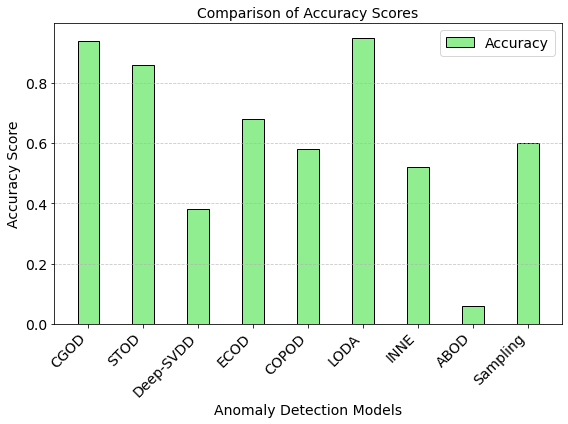

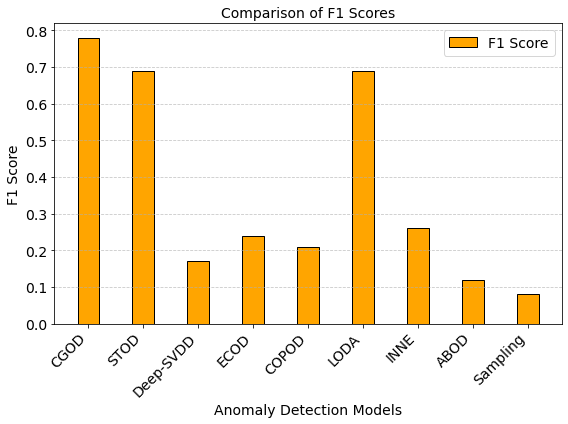

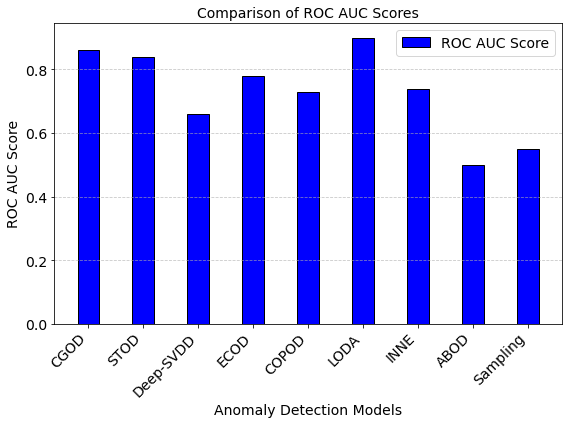

In [56]:
import matplotlib.pyplot as plt

# Define some data for 6 different ML models
models = ["CGOD", "STOD", "Deep-SVDD", "ECOD", "COPOD", "LODA", "INNE", "ABOD", "Sampling"]
# precision = [0.92, 0.63, 0.08, 0.15, 0.12,0.59, 0.05]
accuracy = [0.94, 0.86, 0.38, 0.68, 0.58, 0.95, 0.52, 0.06, 0.60]
f1_score = [0.78, 0.69, 0.17, 0.24, 0.21, 0.69, 0.26, 0.12, 0.08]
roc_auc = [0.86, 0.84, 0.66, 0.78, 0.73, 0.90, 0.74, 0.50, 0.55]



# # Create a bar chart for precision
# plt.figure(figsize=(10, 6))
# plt.bar(models, precision, color='skyblue', edgecolor='black', width=0.4, label='Precision')
# plt.xlabel('ML Models')
# plt.ylabel('Precision Score')
# plt.title('Comparison of Precision Scores for Different ML Models')
# plt.xticks(rotation=45, ha='right')
# plt.legend()
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

# Create a bar chart for accuracy
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy, color='lightgreen', edgecolor='black', width=0.4, label='Accuracy')
plt.xlabel('Anomaly Detection Models', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.title('Comparison of Accuracy Scores', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('acc.jpg', format='jpeg', dpi=300)
plt.show()

# Create a bar chart for F1 score
plt.figure(figsize=(8, 6))
plt.bar(models, f1_score, color='orange', edgecolor='black', width=0.4, label='F1 Score')
plt.xlabel('Anomaly Detection Models', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.title('Comparison of F1 Scores', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('f1.jpeg', format='jpeg', dpi=300)
plt.show()

# Create a bar chart for ROC AUC score
plt.figure(figsize=(8, 6))
plt.bar(models, roc_auc, color='blue', edgecolor='black', width=0.4, label='ROC AUC Score')
plt.xlabel('Anomaly Detection Models', fontsize=14)
plt.ylabel('ROC AUC Score', fontsize=14)
plt.title('Comparison of ROC AUC Scores', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('roc.jpeg', format='jpeg', dpi=300)
plt.show()

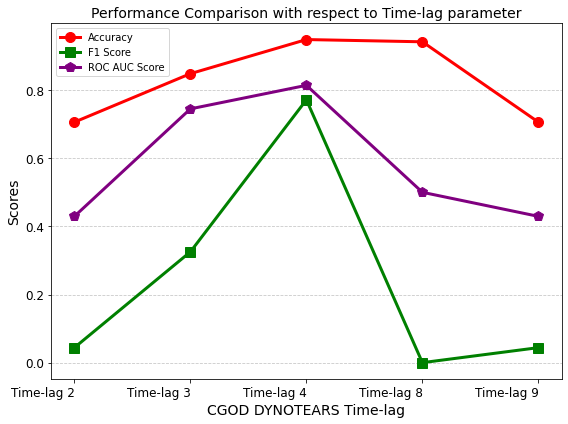

In [55]:
import matplotlib.pyplot as plt

# Define some data for 6 different ML models
models = ["Time-lag 2", "Time-lag 3", "Time-lag 4", "Time-lag 8", "Time-lag 9" ]
# precision = [0.92, 0.63, 0.08, 0.15, 0.12,0.59, 0.05]
accuracy = [0.7059620596205962, 0.8482384823848238, 0.948319783197832, 0.9417344173441734, 0.7059620596205962]
f1_score = [0.04405286343612335, 0.3253012048192771, 0.7714285714285715, 0.0, 0.04405286343612335]
roc_auc = [0.4293625564664547,0.7448887401706542, 0.813953488372093, 0.5, 0.4293625564664547]



# # Create a bar chart for accuracy
plt.figure(figsize=(8, 6))
plt.plot(models, accuracy, color="red", linestyle="-", marker="o", label='Accuracy', linewidth=3, markersize = 10)
plt.plot(models, f1_score, color='green',linestyle="-", marker="s", label='F1 Score', linewidth=3, markersize = 10)
plt.plot(models, roc_auc, color='purple', linestyle="-", marker="p", label='ROC AUC Score', linewidth=3, markersize = 10)

plt.xlabel('CGOD DYNOTEARS Time-lag', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.title('Performance Comparison with respect to Time-lag parameter', fontsize=14)
plt.xticks(ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('perf_tl.jpg', format='jpeg', dpi=300)
plt.show()

# # Create a bar chart for F1 score
# plt.figure(figsize=(8, 6))
# plt.bar(models, f1_score, color='red', edgecolor='black', width=0.3, label='F1 Score')
# plt.xlabel('CGOD DYNOTEARS Time-lag')
# plt.ylabel('F1 Score')
# plt.title('Comparison of F1 Scores')
# plt.xticks( ha='right')
# plt.legend()
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.savefig('f1_tl.jpg', format='jpeg', dpi=300)
# plt.show()

# # # Create a bar chart for ROC AUC score
# plt.figure(figsize=(8, 6))
# plt.bar(models, roc_auc, color='purple', edgecolor='black', width=0.3, label='ROC AUC Score')
# plt.xlabel('CGOD DYNOTEARS Time-lag')
# plt.ylabel('ROC AUC Score')
# plt.title('Comparison of ROC AUC Scores')
# plt.xticks(ha='right')
# plt.legend()
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.savefig('roc_tl.jpg', format='jpeg', dpi=300)
# plt.show()


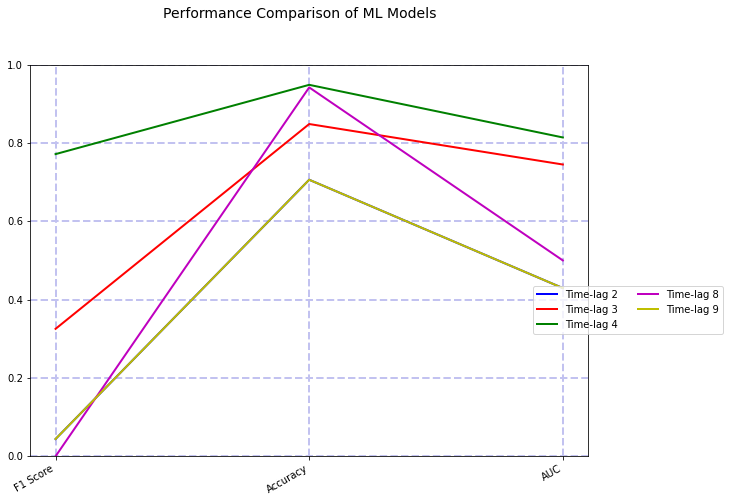

In [194]:
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon

# Define data for five models
models = ["Time-lag 2", "Time-lag 3", "Time-lag 4", "Time-lag 8", "Time-lag 9" ]
# precision = [0.92, 0.63, 0.08, 0.15, 0.12,0.59, 0.05]
accuracy = [0.7059620596205962, 0.8482384823848238, 0.948319783197832, 0.9417344173441734, 0.7059620596205962]
f1_score = [0.04405286343612335, 0.3253012048192771, 0.7714285714285715, 0.0, 0.04405286343612335]
roc_auc = [0.4293625564664547,0.7448887401706542, 0.813953488372093, 0.5, 0.4293625564664547]

# Define number of variables (metrics)
num_vars = 3

# Generate colors for each model
colors = ['b', 'r', 'g', 'm', 'y']

# Create a figure and axes
fig, axes = plt.subplots(1, figsize=(10, 8))

# Set radar chart parameters
labels = ['F1 Score', 'Accuracy', 'AUC']
angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
angles += np.pi / 2  # shift labels to right side

# Create radar chart for each model
for i in range(len(models)):
    ax = axes
    # set center as origin
    center = [0, 0] 

    # create data points for each metric
    data = [f1_score[i], accuracy[i], roc_auc[i]]

    # create polygon patch for model
    polygon = RegularPolygon(xy=center, numVertices=num_vars, radius=0.8, color=colors[i])
    ax.add_artist(polygon)

    # plot data points and connect them with line
    ax.plot(angles, data, linewidth=2, color=colors[i], label=models[i])

    # add labels
    ax.set_xticks(angles)
    ax.set_xticklabels(labels, rotation=30, ha='right')

    # set grid
    ax.grid([0.2, 0.4, 0.6, 0.8], color='#c2c2f0', linestyle='--', linewidth=2)
    ax.set_ylim(0, 1)

# add legend
ax.legend(loc='lower right', bbox_to_anchor=(1.25, 0.3), ncol=2)

# adjust layout
plt.subplots_adjust(bottom=0.2)

# set title and show plot
plt.suptitle('Performance Comparison of ML Models', fontsize=14)
plt.show()

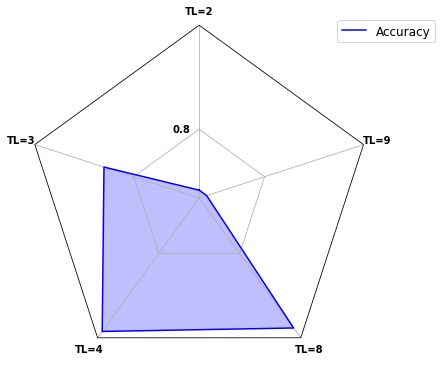

In [268]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections import register_projection
from matplotlib.projections.polar import PolarAxes
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels, fontsize=10, weight='bold')

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


def example_data():
    # The following data is from the Denver Aerosol Sources and Health study.
    # See doi:10.1016/j.atmosenv.2008.12.017
    #
    # The data are pollution source profile estimates for five modeled
    # pollution sources (e.g., cars, wood-burning, etc) that emit 7-9 chemical
    # species. The radar charts are experimented with here to see if we can
    # nicely visualize how the modeled source profiles change across four
    # scenarios:
    #  1) No gas-phase species present, just seven particulate counts on
    #     Sulfate
    #     Nitrate
    #     Elemental Carbon (EC)
    #     Organic Carbon fraction 1 (OC)
    #     Organic Carbon fraction 2 (OC2)
    #     Organic Carbon fraction 3 (OC3)
    #     Pyrolyzed Organic Carbon (OP)
    #  2)Inclusion of gas-phase specie carbon monoxide (CO)
    #  3)Inclusion of gas-phase specie ozone (O3).
    #  4)Inclusion of both gas-phase species is present...
    data = [
        ['TL=2', 'TL=3', 'TL=4', 'TL=8', 'TL=9'],
        ('Time-lag (TL) Parameter performance comparison', [
            [0.7059620596205962, 0.8482384823848238, 0.948319783197832, 0.9417344173441734, 0.7059620596205962]])
    ]
    return data


if __name__ == '__main__':
    N = 5
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data.pop(0)

    fig, axs = plt.subplots(figsize=(8, 6), nrows=1, ncols=1,
                            subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    colors = ['b', 'r', 'g', 'm', 'y']
    # Plot the four cases from the example data on separate axes
    ax = axs
    title = data[0][0]
    case_data = data[0][1]
    ax.set_rgrids([0.2, 0.4, 0.6, 0.8], weight='bold')
    # ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
    #                 horizontalalignment='center', verticalalignment='center')
    for d, color in zip(case_data, colors):
        ax.plot(theta, d, color=color)
        ax.fill(theta, d, facecolor=color, alpha=0.25, label='_nolegend_')
    ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    labels = ('Accuracy', 'F1 Score', 'ROC-AUC')
    legend = axs.legend(labels, loc=(0.9, .95),
                              labelspacing=0.1, fontsize='large')
    # # Add grid lines
    # ax.set_xticks(theta)
    # ax.set_yticklabels([])  # You can adjust this line if you want to show radial axis labels

    # # Customize grid lines
    # ax.grid(True)
    
    # plt.grid(axis='both', linestyle='--', alpha=0.7)
    # plt.tight_layout()
# plt.savefig('perf_tl.jpg', format='jpeg', dpi=300)

    # fig.text(0.5, 0.965, 'Time-lag (TL) Parameter performance comparison',
    #          horizontalalignment='center', color='black', weight='bold',
    #          size='large')
    plt.savefig('radar_acc.jpg', type="jpeg", dpi=300)
    plt.show()

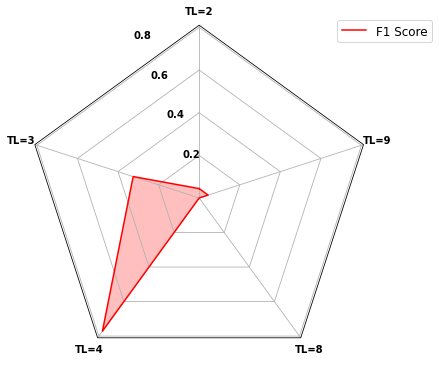

In [269]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections import register_projection
from matplotlib.projections.polar import PolarAxes
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels, fontsize=10, weight='bold')

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


def example_data():
    # The following data is from the Denver Aerosol Sources and Health study.
    # See doi:10.1016/j.atmosenv.2008.12.017
    #
    # The data are pollution source profile estimates for five modeled
    # pollution sources (e.g., cars, wood-burning, etc) that emit 7-9 chemical
    # species. The radar charts are experimented with here to see if we can
    # nicely visualize how the modeled source profiles change across four
    # scenarios:
    #  1) No gas-phase species present, just seven particulate counts on
    #     Sulfate
    #     Nitrate
    #     Elemental Carbon (EC)
    #     Organic Carbon fraction 1 (OC)
    #     Organic Carbon fraction 2 (OC2)
    #     Organic Carbon fraction 3 (OC3)
    #     Pyrolyzed Organic Carbon (OP)
    #  2)Inclusion of gas-phase specie carbon monoxide (CO)
    #  3)Inclusion of gas-phase specie ozone (O3).
    #  4)Inclusion of both gas-phase species is present...
    data = [
        ['TL=2', 'TL=3', 'TL=4', 'TL=8', 'TL=9'],
        ('Time-lag (TL) Parameter performance comparison', [
            [0.04405286343612335, 0.3253012048192771, 0.7714285714285715, 0.0, 0.04405286343612335]])
    ]
    return data


if __name__ == '__main__':
    N = 5
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data.pop(0)

    fig, axs = plt.subplots(figsize=(8, 6), nrows=1, ncols=1,
                            subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    colors = ['r', 'g', 'm', 'y']
    # Plot the four cases from the example data on separate axes
    ax = axs
    title = data[0][0]
    case_data = data[0][1]
    ax.set_rgrids([0.2, 0.4, 0.6, 0.8], weight='bold')
    # ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
    #                 horizontalalignment='center', verticalalignment='center')
    for d, color in zip(case_data, colors):
        ax.plot(theta, d, color=color)
        ax.fill(theta, d, facecolor=color, alpha=0.25, label='_nolegend_')
    ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    labels = ('F1 Score', 'Accuracy', 'ROC-AUC')
    legend = axs.legend(labels, loc=(0.9, .95),
                              labelspacing=0.1, fontsize='large')

    # fig.text(0.5, 0.965, 'Time-lag (TL) Parameter performance comparison',
    #          horizontalalignment='center', color='black', weight='bold',
    #          size='large')
    plt.savefig('radar_f1.jpg', type="jpeg", dpi=300)
    plt.show()

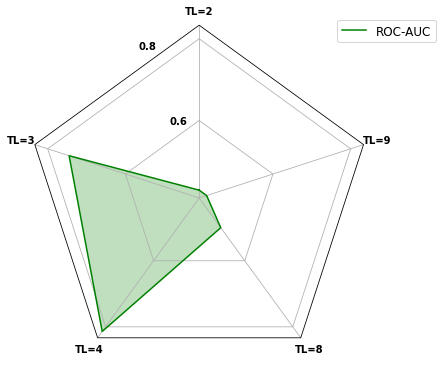

In [271]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections import register_projection
from matplotlib.projections.polar import PolarAxes
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels, fontsize=10, weight='bold')

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


def example_data():
    # The following data is from the Denver Aerosol Sources and Health study.
    # See doi:10.1016/j.atmosenv.2008.12.017
    #
    # The data are pollution source profile estimates for five modeled
    # pollution sources (e.g., cars, wood-burning, etc) that emit 7-9 chemical
    # species. The radar charts are experimented with here to see if we can
    # nicely visualize how the modeled source profiles change across four
    # scenarios:
    #  1) No gas-phase species present, just seven particulate counts on
    #     Sulfate
    #     Nitrate
    #     Elemental Carbon (EC)
    #     Organic Carbon fraction 1 (OC)
    #     Organic Carbon fraction 2 (OC2)
    #     Organic Carbon fraction 3 (OC3)
    #     Pyrolyzed Organic Carbon (OP)
    #  2)Inclusion of gas-phase specie carbon monoxide (CO)
    #  3)Inclusion of gas-phase specie ozone (O3).
    #  4)Inclusion of both gas-phase species is present...
    data = [
        ['TL=2', 'TL=3', 'TL=4', 'TL=8', 'TL=9'],
        ('Time-lag (TL) Parameter performance comparison', [
            [0.4293625564664547,0.7448887401706542, 0.813953488372093, 0.5, 0.4293625564664547]])
    ]
    return data


if __name__ == '__main__':
    N = 5
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data.pop(0)

    fig, axs = plt.subplots(figsize=(8, 6), nrows=1, ncols=1,
                            subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    colors = ['g', 'm', 'y']
    # Plot the four cases from the example data on separate axes
    ax = axs
    title = data[0][0]
    case_data = data[0][1]
    ax.set_rgrids([0.2, 0.4, 0.6, 0.8], weight='bold')
    # ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
    #                 horizontalalignment='center', verticalalignment='center')
    for d, color in zip(case_data, colors):
        ax.plot(theta, d, color=color)
        ax.fill(theta, d, facecolor=color, alpha=0.25, label='_nolegend_')
    ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    labels = ('ROC-AUC', 'Accuracy', 'F1 Score')
    legend = axs.legend(labels, loc=(0.9, .95),
                              labelspacing=0.1, fontsize='large')

    # fig.text(0.5, 0.965, 'Time-lag (TL) Parameter performance comparison',
    #          horizontalalignment='center', color='black', weight='bold',
    #          size='large')
    plt.savefig('radar_roc.jpg', type="jpeg", dpi=300)
    plt.show()

In [26]:
mar_tl = [mar2, mar3, mar4, mar8, mar9] 

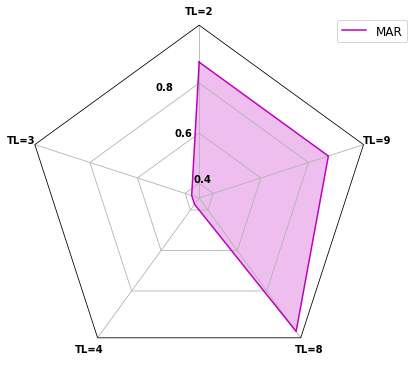

In [27]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections import register_projection
from matplotlib.projections.polar import PolarAxes
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels, fontsize=10, weight='bold')

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


def example_data():
    # The following data is from the Denver Aerosol Sources and Health study.
    # See doi:10.1016/j.atmosenv.2008.12.017
    #
    # The data are pollution source profile estimates for five modeled
    # pollution sources (e.g., cars, wood-burning, etc) that emit 7-9 chemical
    # species. The radar charts are experimented with here to see if we can
    # nicely visualize how the modeled source profiles change across four
    # scenarios:
    #  1) No gas-phase species present, just seven particulate counts on
    #     Sulfate
    #     Nitrate
    #     Elemental Carbon (EC)
    #     Organic Carbon fraction 1 (OC)
    #     Organic Carbon fraction 2 (OC2)
    #     Organic Carbon fraction 3 (OC3)
    #     Pyrolyzed Organic Carbon (OP)
    #  2)Inclusion of gas-phase specie carbon monoxide (CO)
    #  3)Inclusion of gas-phase specie ozone (O3).
    #  4)Inclusion of both gas-phase species is present...
    data = [
        ['TL=2', 'TL=3', 'TL=4', 'TL=8', 'TL=9'],
        ('Time-lag (TL) Parameter performance comparison', [mar_tl])
    ]
    return data


if __name__ == '__main__':
    N = 5
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data.pop(0)

    fig, axs = plt.subplots(figsize=(8, 6), nrows=1, ncols=1,
                            subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    colors = ['m', 'y']
    # Plot the four cases from the example data on separate axes
    ax = axs
    title = data[0][0]
    case_data = data[0][1]
    ax.set_rgrids([0.2, 0.4, 0.6, 0.8], weight='bold')
    # ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
    #                 horizontalalignment='center', verticalalignment='center')
    for d, color in zip(case_data, colors):
        ax.plot(theta, d, color=color)
        ax.fill(theta, d, facecolor=color, alpha=0.25, label='_nolegend_')
    ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    labels = ('MAR','ROC-AUC', 'Accuracy', 'F1 Score')
    legend = axs.legend(labels, loc=(0.9, .95),
                              labelspacing=0.1, fontsize='large')

    # fig.text(0.5, 0.965, 'Time-lag (TL) Parameter performance comparison',
    #          horizontalalignment='center', color='black', weight='bold',
    #          size='large')
    plt.savefig('radar_mar.jpg', type="jpeg", dpi=300)
    plt.show()

In [212]:
data[0][1]

[[0.7059620596205962,
  0.8482384823848238,
  0.948319783197832,
  0.9417344173441734,
  0.7059620596205962],
 [0.04405286343612335,
  0.3253012048192771,
  0.7714285714285715,
  0.0,
  0.04405286343612335],
 [0.4293625564664547,
  0.7448887401706542,
  0.813953488372093,
  0.5,
  0.4293625564664547]]

In [23]:
import time

In [29]:
#CGOD
start = time.time()
struct_model_attack = from_pandas_dynamic(df_attack_train, 4)
struct_mode_normal = from_pandas_dynamic(df_normal_train, 4)
cgod_train_time = time.time() - start

cgod_train_time

6.66236424446106

In [48]:
start = time.time()
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, roc_auc_score
y_pred = []
for i in range(0, len(df_test),900):
    df_struct_test = df_test[i:i+900]
    df_struct_test['Timestamp'] = df_struct_test['Timestamp'].apply(lambda x: x.value)
    struct_model_test = from_pandas_dynamic(df_struct_test, 4)

    shd_TA = structural_hamming_distance(struct_model_attack, struct_model_test)
    shd_TN = structural_hamming_distance(struct_mode_normal, struct_model_test)

    if shd_TA<shd_TN:
        y_pred.append(1)
    else:
        y_pred.append(0)

roc4 = roc_auc_score(y_true_segs, y_pred)
acc4 = accuracy_score(y_true_segs, y_pred)
f14 = f1_score(y_true_segs, y_pred)

cgod_test_time = time.time() - start

print(f" ROC_tl4 : {roc4}")
print(f"Accuracy_tl4 : {acc4}")
print(f"F1_Score_tl4 : {f14}")

cgod_test_time

 ROC_tl4 : 0.813953488372093
Accuracy_tl4 : 0.978319783197832
F1_Score_tl4 : 0.7714285714285715


377.62457513809204

In [160]:
#Baseline_Models
df_attack_train_baseline = pd.read_csv('../SWaT_Dataset/2015/final_csv/attack_data_trainV5.csv',index_col=0).reset_index(drop=True)
df_normal_train_baseline = pd.read_csv('../SWaT_Dataset/2015/final_csv/normal_data_trainV5.csv',index_col=0).reset_index(drop=True)
df_test_baseline = pd.read_csv('../SWaT_Dataset/2015/final_csv/test_data_v5.csv',index_col=0).reset_index(drop=True)
df_baseline_train = pd.concat([df_normal_train_baseline, df_attack_train_baseline, df_test_baseline[:27602]]).reset_index(drop=True)
df_baseline_test = df_test_baseline[27602:].reset_index(drop=True)
df_baseline_train.drop(columns='Timestamp', inplace=True)
df_baseline_test.drop(columns='Timestamp', inplace=True)
df_baseline_train = df_baseline_train.sample(frac=1)
y_train = df_baseline_train['IsAttack']
df_baseline_train.drop(columns=['IsAttack'], inplace=True)
X_train = df_baseline_train
y_test = df_baseline_test['IsAttack']
df_baseline_test.drop(columns=['IsAttack'], inplace=True)
X_test = df_baseline_test

In [161]:
#Deep SVDD
start_train = time.time()
from pyod.models.deep_svdd import DeepSVDD
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

model = DeepSVDD()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

svdd_train_time = time.time() - start_train

start_test = time.time()

y_test_preds = model.predict(X_test)

y_test_Scores = model.decision_function(X_test)

y_true_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)

# precision = precision_score(y_true_baseline, y_pred_baseline)
# recall = recall_score(y_true_baseline, y_pred_baseline)
# f1Score = f1_score(y_true_baseline, y_pred_baseline)
# roc = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc = accuracy_score(y_true_baseline, y_pred_baseline)

svdd_test_time = time.time() - start_test

# print(f"Precision : {precision}")
# print(f"Recall : {recall}")
# print(f" ROC : {roc}")
# print(f"Accuracy : {acc}")
# print(f"F1_Score : {f1Score}")
print (svdd_train_time, svdd_test_time)

9637/9637 [==============================] - 8s 803us/step
Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 51)]              0         
                                                                 
 dense_5 (Dense)             (None, 64)                3264      
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_5 (TFOpLa  (None, 32)                0         
 mbda)                                                           
                                                                 
 tf.math.pow_5 (TFOpLambda)  (None, 32)                0         
                                                                 
 tf.math.reduce_sum_5 (TFOp  (None,)                   0         


In [183]:
# start_train = time.time()
from pyod.models.ecod import ECOD
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

model = ECOD()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

# ecod_train_time = time.time() - start_train

# start_test = time.time()

y_test_preds = model.predict(X_test)

y_test_Scores = model.decision_function(X_test)

y_true_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)

precision = precision_score(y_true_baseline, y_pred_baseline)
recall = recall_score(y_true_baseline, y_pred_baseline)
f1Score = f1_score(y_true_baseline, y_pred_baseline)
roc = roc_auc_score(y_true_baseline, y_pred_baseline)
acc = accuracy_score(y_true_baseline, y_pred_baseline)

# ecod_test_time = time.time() - start_test

print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f" ROC : {roc}")
print(f"Accuracy : {acc}")
print(f"F1_Score : {f1Score}")

# print (ecod_train_time, ecod_test_time)

Precision : 0.14885496183206107
Recall : 0.8863636363636364
 ROC : 0.7752601314348303
Accuracy : 0.6779661016949152
F1_Score : 0.25490196078431376


In [184]:
# start_train = time.time()
from pyod.models.copod import COPOD
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

model = COPOD()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

# copod_train_time = time.time() - start_train

# start_test = time.time()

y_test_preds = model.predict(X_test)

y_test_Scores = model.decision_function(X_test)

y_true_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)

precision = precision_score(y_true_baseline, y_pred_baseline)
recall = recall_score(y_true_baseline, y_pred_baseline)
f1Score = f1_score(y_true_baseline, y_pred_baseline)
roc = roc_auc_score(y_true_baseline, y_pred_baseline)
acc = accuracy_score(y_true_baseline, y_pred_baseline)

# copod_test_time = time.time() - start_test

print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f" ROC : {roc}")
print(f"Accuracy : {acc}")
print(f"F1_Score : {f1Score}")
# print (copod_train_time, copod_test_time)

Precision : 0.11904761904761904
Recall : 0.9090909090909091
 ROC : 0.7316538882803942
Accuracy : 0.576271186440678
F1_Score : 0.21052631578947367


In [185]:
# start_train = time.time()
from pyod.models.loda import LODA
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

model = LODA()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

# loda_train_time = time.time() - start_train

# start_test = time.time()

y_test_preds = model.predict(X_test)

y_test_Scores = model.decision_function(X_test)

y_true_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)

precision = precision_score(y_true_baseline, y_pred_baseline)
recall = recall_score(y_true_baseline, y_pred_baseline)
f1Score = f1_score(y_true_baseline, y_pred_baseline)
roc = roc_auc_score(y_true_baseline, y_pred_baseline)
acc = accuracy_score(y_true_baseline, y_pred_baseline)

# loda_test_time = time.time() - start_test

print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f" ROC : {roc}")
print(f"Accuracy : {acc}")
print(f"F1_Score : {f1Score}")

# print (loda_train_time, loda_test_time)

Precision : 0.25
Recall : 0.022727272727272728
 ROC : 0.5091046002190581
Accuracy : 0.9350282485875706
F1_Score : 0.04166666666666667


In [186]:
# start_train = time.time()
from pyod.models.inne import INNE
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

model = INNE()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

# inne_train_time = time.time() - start_train

# start_test = time.time()

y_test_preds = model.predict(X_test)

y_test_Scores = model.decision_function(X_test)

y_true_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)

precision = precision_score(y_true_baseline, y_pred_baseline)
recall = recall_score(y_true_baseline, y_pred_baseline)
f1Score = f1_score(y_true_baseline, y_pred_baseline)
roc = roc_auc_score(y_true_baseline, y_pred_baseline)
acc = accuracy_score(y_true_baseline, y_pred_baseline)

# inne_test_time = time.time() - start_test

print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f" ROC : {roc}")
print(f"Accuracy : {acc}")
print(f"F1_Score : {f1Score}")

# print (inne_train_time, inne_test_time)

Precision : 0.3282442748091603
Recall : 0.9772727272727273
 ROC : 0.9223713033953999
Accuracy : 0.8742937853107344
F1_Score : 0.4914285714285714


In [187]:
# start_train = time.time()
from pyod.models.abod import ABOD
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

model = ABOD()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

# abod_train_time = time.time() - start_train

# start_test = time.time()

y_test_preds = model.predict(X_test)

y_test_Scores = model.decision_function(X_test)

y_true_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)

precision = precision_score(y_true_baseline, y_pred_baseline)
recall = recall_score(y_true_baseline, y_pred_baseline)
f1Score = f1_score(y_true_baseline, y_pred_baseline)
roc = roc_auc_score(y_true_baseline, y_pred_baseline)
acc = accuracy_score(y_true_baseline, y_pred_baseline)

# abod_test_time = time.time() - start_test

print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f" ROC : {roc}")
print(f"Accuracy : {acc}")
print(f"F1_Score : {f1Score}")
# print (abod_train_time, abod_test_time)

Precision : 0.062146892655367235
Recall : 1.0
 ROC : 0.5
Accuracy : 0.062146892655367235
F1_Score : 0.11702127659574468


In [188]:
# start_train = time.time()
from pyod.models.sampling import Sampling
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

model = Sampling()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

# sampling_train_time = time.time() - start_train

# start_test = time.time()

y_test_preds = model.predict(X_test)

y_test_Scores = model.decision_function(X_test)

y_true_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)

precision = precision_score(y_true_baseline, y_pred_baseline)
recall = recall_score(y_true_baseline, y_pred_baseline)
f1Score = f1_score(y_true_baseline, y_pred_baseline)
roc = roc_auc_score(y_true_baseline, y_pred_baseline)
acc = accuracy_score(y_true_baseline, y_pred_baseline)

# sampling_test_time = time.time() - start_test

print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f" ROC : {roc}")
print(f"Accuracy : {acc}")
print(f"F1_Score : {f1Score}")

# print (sampling_train_time, sampling_test_time)

Precision : 0.10526315789473684
Recall : 0.2727272727272727
 ROC : 0.5595564074479737
Accuracy : 0.8107344632768362
F1_Score : 0.1518987341772152


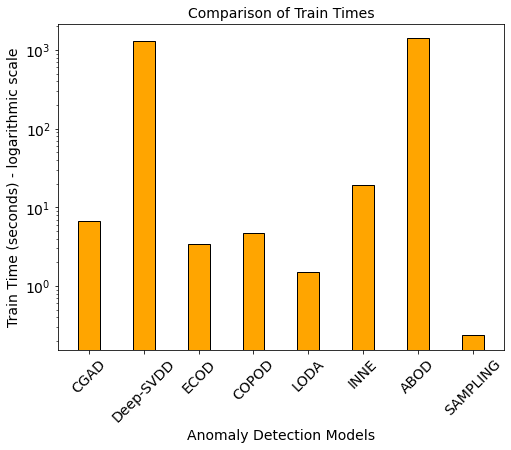

In [273]:
import matplotlib.pyplot as plt
models = ["CGAD", "Deep-SVDD", "ECOD", "COPOD", "LODA", "INNE", "ABOD", "SAMPLING"]
train_times = [6.66236424446106, 1284.323377609253 , 3.4056591987609863 , 4.694462299346924 ,
                1.5214760303497314 , 19.06517481803894 , 1401.3943567276 , 0.2383720874786377 ]


plt.figure(figsize=(8, 6))
plt.bar(models, train_times, color='orange', edgecolor='black', width=0.4)
plt.yscale("log")
plt.xlabel("Anomaly Detection Models", fontsize=14)
plt.ylabel("Train Time (seconds) - logarithmic scale", fontsize=14)
plt.title("Comparison of Train Times", fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('train_cmp.jpg', format="jpeg", dpi=300, bbox_inches = 'tight')
plt.show()

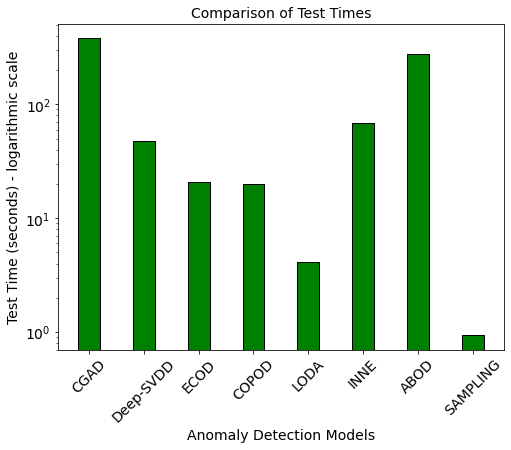

In [274]:
import matplotlib.pyplot as plt
models = ["CGAD", "Deep-SVDD", "ECOD", "COPOD", "LODA", "INNE", "ABOD", "SAMPLING"]
test_times = [377.62457513809204, 47.99033212661743, 20.7255642414093, 19.950873851776123,
                4.100617408752441, 68.00257205963135, 275.41322469711304, 0.9435856342315674]


plt.figure(figsize=(8, 6))
plt.bar(models, test_times, color = "green", edgecolor='black', width=0.4)
plt.yscale("log")
plt.xlabel("Anomaly Detection Models", fontsize=14)
plt.ylabel("Test Time (seconds) - logarithmic scale", fontsize=14)
plt.title("Comparison of Test Times", fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('test_cmp.jpg', format="jpeg", dpi=300, bbox_inches = 'tight')
plt.show()

In [ ]:
# viz = plot_structure(
#     struct_mode_normal,
#     all_node_attributes=NODE_STYLE.WEAK,
#     all_edge_attributes=EDGE_STYLE.WEAK,
# )
# causalnex.plots.display_plot_ipython(viz, "sem_normal.png", layout_kwargs=None)

In [40]:
svdd_test_time, svdd_train_time

(38.91601204872131, 1493.0865433216095)

In [66]:
#Comparison with DAG with NOTEARS

struct_model_attack_notears = from_pandas(df_attack_train)


In [67]:
struct_model_normal_notears = from_pandas(df_normal_train)

In [73]:
sum(y_true_segs[:300])

6

In [77]:
y_true_segs_notears = []
for i in range(0, len(y_true), 900):
    # print(sum(y_true[i:i+900]))
    if (sum(y_true[i:i+900])>0):
        y_true_segs_notears.append(1)
    else:
        y_true_segs_notears.append(0)

In [78]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, roc_auc_score
y_pred = []
for i in range(0, len(y_true), 900):
    df_struct_test_notears = df_test[i:i+900]
    df_struct_test_notears['Timestamp'] = df_struct_test_notears['Timestamp'].apply(lambda x: x.value)
    struct_model_test_notears = from_pandas(df_struct_test_notears)

    shd_TA = structural_hamming_distance(struct_model_attack_notears, struct_model_test)
    shd_TN = structural_hamming_distance(struct_model_normal_notears, struct_model_test)

    if shd_TA<shd_TN:
        y_pred.append(1)
    else:
        y_pred.append(0)

roc_notears = roc_auc_score(y_true_segs_notears, y_pred)
acc_notears = accuracy_score(y_true_segs_notears, y_pred)
f1_notears = f1_score(y_true_segs_notears, y_pred)

print(f" ROC : {roc_notears}")
print(f"Accuracy : {acc_notears}")
print(f"F1_Score : {f1_notears}")

 ROC : 0.5
Accuracy : 0.9417344173441734
F1_Score : 0.0


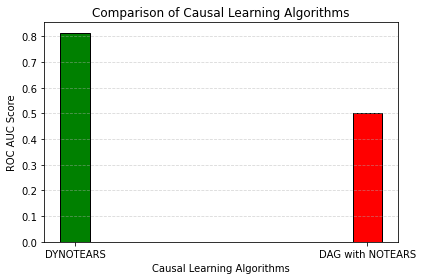

In [94]:
import matplotlib.pyplot as plt

# Define some data for 6 different ML models
models = ["DYNOTEARS", "DAG with NOTEARS" ]
accuracy = [acc4, acc_notears]
f1_score = [f14, f1_notears]
roc_auc = [roc4, roc_notears]
clr = ["green", "red"]



# # Create a bar chart for accuracy
# plt.figure(figsize=(5, 3))
# plt.bar(models, accuracy, color=clr, edgecolor='black', width=0.4, label='Accuracy')
# plt.xlabel('Causal Learning Algorithms')
# plt.ylabel('Accuracy Score')
# plt.title('Comparison of Causal Learning Algorithms on Accuracy')
# plt.xticks(ha='right')
# plt.legend()
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

# # Create a bar chart for F1 score
# plt.figure(figsize=(5, 3))
# plt.bar(models, f1_score, color=clr, edgecolor='black', width=0.4, label='F1 Score')
# plt.xlabel('Causal Learning Algorithms')
# plt.ylabel('F1 Score')
# plt.title('Comparison of Causal Learning Algorithms on F1-scores')
# plt.xticks( ha='right')
# plt.legend()
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

# Create a bar chart for ROC AUC score
plt.figure(figsize=(6, 4))
plt.bar(models, roc_auc, color=clr, edgecolor='black', width=0.1, label='ROC AUC Score')
plt.xlabel('Causal Learning Algorithms')
plt.ylabel('ROC AUC Score')
plt.title('Comparison of Causal Learning Algorithms')
plt.xticks(ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [58]:
#Box Plot

df_attack_train = pd.read_csv('../SWaT_Dataset/2015/final_csv/attack_data_trainV5.csv',index_col=0).reset_index(drop=True)
df_normal_train = pd.read_csv('../SWaT_Dataset/2015/final_csv/normal_data_trainV5.csv',index_col=0).reset_index(drop=True)
df_test = pd.read_csv('../SWaT_Dataset/2015/final_csv/test_data_v5.csv',index_col=0).reset_index(drop=True)

In [59]:
df_attack_train['Timestamp'] = pd.to_datetime(df_attack_train['Timestamp'])
df_normal_train['Timestamp'] = pd.to_datetime(df_normal_train['Timestamp'])
df_test['Timestamp'] = pd.to_datetime(df_test['Timestamp'])
df_attack_train['Timestamp'] = df_attack_train['Timestamp'].apply(lambda x:x.value)
df_attack_train.drop(columns='IsAttack', inplace=True)


In [60]:
struct_model_attack = from_pandas_dynamic(df_attack_train, 4)
df_normal_train['Timestamp'] = df_normal_train['Timestamp'].apply(lambda x:x.value)
df_normal_train.drop(columns='IsAttack', inplace=True)

struct_model_normal = from_pandas_dynamic(df_normal_train, 4)

y_true = df_test['IsAttack']
df_test.drop(columns=['IsAttack'], inplace=True)

y_true_segs = []
for i in range(0, len(y_true), 900):
    # print(sum(y_true[i:i+900]))
    if (sum(y_true[i:i+900])>0):
        y_true_segs.append(1)
    else:
        y_true_segs.append(0)


In [63]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, roc_auc_score
y_pred = []

for i in range(0, len(df_test),900):
    df_struct_test = df_test[i:i+900]
    df_struct_test['Timestamp'] = df_struct_test['Timestamp'].apply(lambda x: x.value)
    struct_model_test = from_pandas_dynamic(df_struct_test, 4)

    shd_TA = structural_hamming_distance(struct_model_attack, struct_model_test)
    shd_TN = structural_hamming_distance(struct_model_normal, struct_model_test)

    if shd_TA<shd_TN:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [66]:
roc_cgod = []
acc_cgod = []
f1_cgod = []

roc = roc_auc_score(y_true_segs, y_pred)
roc_cgod.append(roc)
acc = accuracy_score(y_true_segs, y_pred)
acc_cgod.append(acc)
f1 = f1_score(y_true_segs, y_pred)
f1_cgod.append(f1)


In [67]:
print (roc_cgod)
print (acc_cgod)
print (f1_cgod)

[0.813953488372093]
[0.978319783197832]
[0.7714285714285715]


In [68]:
df_test = pd.read_csv('../SWaT_Dataset/2015/final_csv/test_data_v5.csv',index_col=0).reset_index(drop=True)
df_test['Timestamp'] = pd.to_datetime(df_test['Timestamp'])



In [69]:
df_test_1 = df_test

group_size = 1200

# Calculate the number of groups
num_groups = len(df_test_1) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(df_test_1))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df = df_test_1.iloc[shuffled_indices].reset_index(drop=True)
df_test_1 = shuffled_df


y_true = df_test_1['IsAttack']
df_test_1.drop(columns=['IsAttack'], inplace=True)

y_true_segs = []
for i in range(0, len(y_true), 900):
    # print(sum(y_true[i:i+900]))
    if (sum(y_true[i:i+900])>0):
        y_true_segs.append(1)
    else:
        y_true_segs.append(0)


y_pred = []

for i in range(0, len(df_test_1),900):
    df_struct_test = df_test_1[i:i+900]
    df_struct_test['Timestamp'] = df_struct_test['Timestamp'].apply(lambda x: x.value)
    struct_model_test = from_pandas_dynamic(df_struct_test, 4)

    shd_TA = structural_hamming_distance(struct_model_attack, struct_model_test)
    shd_TN = structural_hamming_distance(struct_model_normal, struct_model_test)

    if shd_TA<shd_TN:
        y_pred.append(1)
    else:
        y_pred.append(0)


roc_1 = roc_auc_score(y_true_segs, y_pred)
roc_cgod.append(roc_1)
acc_1 = accuracy_score(y_true_segs, y_pred)
acc_cgod.append(acc_1)
f1_1 = f1_score(y_true_segs, y_pred)
f1_cgod.append(f1_1)


In [70]:
df_test_2 = df_test

group_size = 1400

# Calculate the number of groups
num_groups = len(df_test_2) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(df_test_2))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df = df_test_2.iloc[shuffled_indices].reset_index(drop=True)
df_test_2 = shuffled_df


y_true = df_test_2['IsAttack']
df_test_2.drop(columns=['IsAttack'], inplace=True)

y_true_segs = []
for i in range(0, len(y_true), 900):
    # print(sum(y_true[i:i+900]))
    if (sum(y_true[i:i+900])>0):
        y_true_segs.append(1)
    else:
        y_true_segs.append(0)


y_pred = []

for i in range(0, len(df_test_2),900):
    df_struct_test = df_test_2[i:i+900]
    df_struct_test['Timestamp'] = df_struct_test['Timestamp'].apply(lambda x: x.value)
    struct_model_test = from_pandas_dynamic(df_struct_test, 4)

    shd_TA = structural_hamming_distance(struct_model_attack, struct_model_test)
    shd_TN = structural_hamming_distance(struct_model_normal, struct_model_test)

    if shd_TA<shd_TN:
        y_pred.append(1)
    else:
        y_pred.append(0)


roc_2 = roc_auc_score(y_true_segs, y_pred)
roc_cgod.append(roc_2)
acc_2 = accuracy_score(y_true_segs, y_pred)
acc_cgod.append(acc_2)
f1_2 = f1_score(y_true_segs, y_pred)
f1_cgod.append(f1_2)

In [71]:
df_test_3 = df_test

group_size = 1600

# Calculate the number of groups
num_groups = len(df_test_3) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(df_test_3))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df = df_test_3.iloc[shuffled_indices].reset_index(drop=True)
df_test_3 = shuffled_df


y_true = df_test_3['IsAttack']
df_test_3.drop(columns=['IsAttack'], inplace=True)

y_true_segs = []
for i in range(0, len(y_true), 900):
    # print(sum(y_true[i:i+900]))
    if (sum(y_true[i:i+900])>0):
        y_true_segs.append(1)
    else:
        y_true_segs.append(0)


y_pred = []

for i in range(0, len(df_test_3),900):
    df_struct_test = df_test_3[i:i+900]
    df_struct_test['Timestamp'] = df_struct_test['Timestamp'].apply(lambda x: x.value)
    struct_model_test = from_pandas_dynamic(df_struct_test, 4)

    shd_TA = structural_hamming_distance(struct_model_attack, struct_model_test)
    shd_TN = structural_hamming_distance(struct_model_normal, struct_model_test)

    if shd_TA<shd_TN:
        y_pred.append(1)
    else:
        y_pred.append(0)


roc_3 = roc_auc_score(y_true_segs, y_pred)
roc_cgod.append(roc_3)
acc_3 = accuracy_score(y_true_segs, y_pred)
acc_cgod.append(acc_3)
f1_3 = f1_score(y_true_segs, y_pred)
f1_cgod.append(f1_3)

In [72]:
df_test_4 = df_test

group_size = 800

# Calculate the number of groups
num_groups = len(df_test_4) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(df_test_4))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df = df_test_4.iloc[shuffled_indices].reset_index(drop=True)
df_test_4 = shuffled_df


y_true = df_test_4['IsAttack']
df_test_4.drop(columns=['IsAttack'], inplace=True)

y_true_segs = []
for i in range(0, len(y_true), 900):
    # print(sum(y_true[i:i+900]))
    if (sum(y_true[i:i+900])>0):
        y_true_segs.append(1)
    else:
        y_true_segs.append(0)


y_pred = []

for i in range(0, len(df_test_4),900):
    df_struct_test = df_test_4[i:i+900]
    df_struct_test['Timestamp'] = df_struct_test['Timestamp'].apply(lambda x: x.value)
    struct_model_test = from_pandas_dynamic(df_struct_test, 4)

    shd_TA = structural_hamming_distance(struct_model_attack, struct_model_test)
    shd_TN = structural_hamming_distance(struct_model_normal, struct_model_test)

    if shd_TA<shd_TN:
        y_pred.append(1)
    else:
        y_pred.append(0)


roc_4 = roc_auc_score(y_true_segs, y_pred)
roc_cgod.append(roc_4)
acc_4 = accuracy_score(y_true_segs, y_pred)
acc_cgod.append(acc_4)
f1_4 = f1_score(y_true_segs, y_pred)
f1_cgod.append(f1_4)

In [73]:
df_test_5 = df_test

group_size = 600

# Calculate the number of groups
num_groups = len(df_test_5) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(df_test_5))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df = df_test_5.iloc[shuffled_indices].reset_index(drop=True)
df_test_5 = shuffled_df


y_true = df_test_5['IsAttack']
df_test_5.drop(columns=['IsAttack'], inplace=True)

y_true_segs = []
for i in range(0, len(y_true), 900):
    # print(sum(y_true[i:i+900]))
    if (sum(y_true[i:i+900])>0):
        y_true_segs.append(1)
    else:
        y_true_segs.append(0)


y_pred = []

for i in range(0, len(df_test_5),900):
    df_struct_test = df_test_5[i:i+900]
    df_struct_test['Timestamp'] = df_struct_test['Timestamp'].apply(lambda x: x.value)
    struct_model_test = from_pandas_dynamic(df_struct_test, 4)

    shd_TA = structural_hamming_distance(struct_model_attack, struct_model_test)
    shd_TN = structural_hamming_distance(struct_model_normal, struct_model_test)

    if shd_TA<shd_TN:
        y_pred.append(1)
    else:
        y_pred.append(0)


roc_5 = roc_auc_score(y_true_segs, y_pred)
roc_cgod.append(roc_5)
acc_5 = accuracy_score(y_true_segs, y_pred)
acc_cgod.append(acc_5)
f1_5 = f1_score(y_true_segs, y_pred)
f1_cgod.append(f1_5)

In [63]:
roc_cgod = [0.813953488372093, 0.775, 0.7230769230769231, 0.7133333333333334, 0.7583333333333333, 0.79]
acc_cgod = [0.938319783197832, 0.9434146341463414, 0.9212195121951219, 0.9217344173441734, 0.9407046070460704, 0.9115447154471545]
f1_cgod = [0.7714285714285715, 0.7096774193548387, 0.6170212765957447, 0.5981308411214953, 0.6813186813186815, 0.7341772151898733]

In [77]:
#Baseline_Models
df_attack_train_baseline = pd.read_csv('../SWaT_Dataset/2015/final_csv/attack_data_trainV5.csv',index_col=0).reset_index(drop=True)
df_normal_train_baseline = pd.read_csv('../SWaT_Dataset/2015/final_csv/normal_data_trainV5.csv',index_col=0).reset_index(drop=True)
df_test_baseline = pd.read_csv('../SWaT_Dataset/2015/final_csv/test_data_v5.csv',index_col=0).reset_index(drop=True)
df_baseline_train = pd.concat([df_normal_train_baseline, df_attack_train_baseline, df_test_baseline[:27602]]).reset_index(drop=True)
df_baseline_test = df_test_baseline[27602:].reset_index(drop=True)
df_baseline_train.drop(columns='Timestamp', inplace=True)
df_baseline_test.drop(columns='Timestamp', inplace=True)
df_baseline_train = df_baseline_train.sample(frac=1)
y_train = df_baseline_train['IsAttack']
df_baseline_train.drop(columns=['IsAttack'], inplace=True)
X_train = df_baseline_train
y_test = df_baseline_test['IsAttack']
df_baseline_test.drop(columns=['IsAttack'], inplace=True)
X_test = df_baseline_test

In [82]:
from pyod.models.ecod import ECOD
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

model = ECOD()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

ecod_train_time = time.time() - start_train

start_test = time.time()

y_test_preds = model.predict(X_test)

y_test_Scores = model.decision_function(X_test)

y_true_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)


roc_ecod = []
acc_ecod = []
f1_ecod = []

f1Score = f1_score(y_true_baseline, y_pred_baseline)
roc = roc_auc_score(y_true_baseline, y_pred_baseline)
acc = accuracy_score(y_true_baseline, y_pred_baseline)

roc_ecod.append(roc)
f1_ecod.append(f1Score)
acc_ecod.append(acc)

In [83]:
X_test_1 = X_test
y_test_1 = y_test

group_size = 1200

# Calculate the number of groups
num_groups = len(X_test_1) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_1))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_1.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_1.iloc[shuffled_indices].reset_index(drop=True)

X_test_1 = shuffled_df_X
y_test_1 = shuffled_df_y

model = ECOD()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

ecod_train_time = time.time() - start_train

start_test = time.time()

y_test_preds = model.predict(X_test_1)

y_test_Scores = model.decision_function(X_test_1)

y_true_baseline = []
for i in range(0, len(y_test_1),900):
    if (sum(y_test_1[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test_1),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)


f1Score_1 = f1_score(y_true_baseline, y_pred_baseline)
roc_1 = roc_auc_score(y_true_baseline, y_pred_baseline)
acc_1 = accuracy_score(y_true_baseline, y_pred_baseline)

roc_ecod.append(roc_1)
f1_ecod.append(f1Score_1)
acc_ecod.append(acc_1)

In [84]:
X_test_2 = X_test
y_test_2 = y_test

group_size = 1400

# Calculate the number of groups
num_groups = len(X_test_2) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_2))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_2.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_2.iloc[shuffled_indices].reset_index(drop=True)

X_test_2 = shuffled_df_X
y_test_2 = shuffled_df_y

model = ECOD()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

ecod_train_time = time.time() - start_train

start_test = time.time()

y_test_preds = model.predict(X_test_2)

y_test_Scores = model.decision_function(X_test_2)

y_true_baseline = []
for i in range(0, len(y_test_2),900):
    if (sum(y_test_2[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test_2),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)


f1Score_2 = f1_score(y_true_baseline, y_pred_baseline)
roc_2 = roc_auc_score(y_true_baseline, y_pred_baseline)
acc_2 = accuracy_score(y_true_baseline, y_pred_baseline)

roc_ecod.append(roc_2)
f1_ecod.append(f1Score_2)
acc_ecod.append(acc_2)

In [85]:
X_test_3 = X_test
y_test_3 = y_test

group_size = 1600

# Calculate the number of groups
num_groups = len(X_test_3) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_3))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_3.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_3.iloc[shuffled_indices].reset_index(drop=True)

X_test_3 = shuffled_df_X
y_test_3 = shuffled_df_y

model = ECOD()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

ecod_train_time = time.time() - start_train

start_test = time.time()

y_test_preds = model.predict(X_test_3)

y_test_Scores = model.decision_function(X_test_3)

y_true_baseline = []
for i in range(0, len(y_test_3),900):
    if (sum(y_test_3[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test_3),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)



f1Score_3 = f1_score(y_true_baseline, y_pred_baseline)
roc_3 = roc_auc_score(y_true_baseline, y_pred_baseline)
acc_3 = accuracy_score(y_true_baseline, y_pred_baseline)

roc_ecod.append(roc_3)
f1_ecod.append(f1Score_3)
acc_ecod.append(acc_3)

In [86]:
X_test_4 = X_test
y_test_4 = y_test

group_size = 800

# Calculate the number of groups
num_groups = len(X_test_4) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_4))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_4.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_4.iloc[shuffled_indices].reset_index(drop=True)

X_test_4 = shuffled_df_X
y_test_4 = shuffled_df_y

model = ECOD()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

ecod_train_time = time.time() - start_train

start_test = time.time()

y_test_preds = model.predict(X_test_4)

y_test_Scores = model.decision_function(X_test_4)

y_true_baseline = []
for i in range(0, len(y_test_4),900):
    if (sum(y_test_4[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test_4),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)



f1Score_4 = f1_score(y_true_baseline, y_pred_baseline)
roc_4 = roc_auc_score(y_true_baseline, y_pred_baseline)
acc_4 = accuracy_score(y_true_baseline, y_pred_baseline)

roc_ecod.append(roc_4)
f1_ecod.append(f1Score_4)
acc_ecod.append(acc_4)

In [275]:
roc_ecod = [0.7752601314348303, 0.7053571428571428, 0.704320987654321, 0.6889996308600959, 0.7075263336731227]
f1_ecod = [0.25490196078431376, 0.23556581986143188, 0.24561403508771928, 0.24628450106157113, 0.23058823529411765]
acc_ecod = [0.6779661016949152, 0.5324858757062146, 0.5141242937853108, 0.4985875706214689, 0.538135593220339]

In [88]:
from pyod.models.copod import COPOD
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

model = COPOD()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

ecod_train_time = time.time() - start_train

start_test = time.time()

y_test_preds = model.predict(X_test)

y_test_Scores = model.decision_function(X_test)

y_true_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)


roc_copod = []
acc_copod = []
f1_copod = []

f1Score = f1_score(y_true_baseline, y_pred_baseline)
roc = roc_auc_score(y_true_baseline, y_pred_baseline)
acc = accuracy_score(y_true_baseline, y_pred_baseline)

roc_copod.append(roc)
f1_copod.append(f1Score)
acc_copod.append(acc)

X_test_1 = X_test
y_test_1 = y_test

group_size = 1200

# Calculate the number of groups
num_groups = len(X_test_1) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_1))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_1.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_1.iloc[shuffled_indices].reset_index(drop=True)

X_test_1 = shuffled_df_X
y_test_1 = shuffled_df_y


y_test_preds = model.predict(X_test_1)

y_test_Scores = model.decision_function(X_test_1)

y_true_baseline = []
for i in range(0, len(y_test_1),900):
    if (sum(y_test_1[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test_1),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)


f1Score_1 = f1_score(y_true_baseline, y_pred_baseline)
roc_1 = roc_auc_score(y_true_baseline, y_pred_baseline)
acc_1 = accuracy_score(y_true_baseline, y_pred_baseline)

roc_copod.append(roc_1)
f1_copod.append(f1Score_1)
acc_copod.append(acc_1)

X_test_2 = X_test
y_test_2 = y_test

group_size = 1400

# Calculate the number of groups
num_groups = len(X_test_2) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_2))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_2.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_2.iloc[shuffled_indices].reset_index(drop=True)

X_test_2 = shuffled_df_X
y_test_2 = shuffled_df_y

y_test_preds = model.predict(X_test_2)

y_test_Scores = model.decision_function(X_test_2)

y_true_baseline = []
for i in range(0, len(y_test_2),900):
    if (sum(y_test_2[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test_2),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)


f1Score_2 = f1_score(y_true_baseline, y_pred_baseline)
roc_2 = roc_auc_score(y_true_baseline, y_pred_baseline)
acc_2 = accuracy_score(y_true_baseline, y_pred_baseline)

roc_copod.append(roc_2)
f1_copod.append(f1Score_2)
acc_copod.append(acc_2)

X_test_3 = X_test
y_test_3 = y_test

group_size = 1600

# Calculate the number of groups
num_groups = len(X_test_3) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_3))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_3.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_3.iloc[shuffled_indices].reset_index(drop=True)

X_test_3 = shuffled_df_X
y_test_3 = shuffled_df_y

y_test_preds = model.predict(X_test_3)

y_test_Scores = model.decision_function(X_test_3)

y_true_baseline = []
for i in range(0, len(y_test_3),900):
    if (sum(y_test_3[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test_3),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)



f1Score_3 = f1_score(y_true_baseline, y_pred_baseline)
roc_3 = roc_auc_score(y_true_baseline, y_pred_baseline)
acc_3 = accuracy_score(y_true_baseline, y_pred_baseline)

roc_copod.append(roc_3)
f1_copod.append(f1Score_3)
acc_copod.append(acc_3)


X_test_4 = X_test
y_test_4 = y_test

group_size = 800

# Calculate the number of groups
num_groups = len(X_test_4) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_4))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_4.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_4.iloc[shuffled_indices].reset_index(drop=True)

X_test_4 = shuffled_df_X
y_test_4 = shuffled_df_y

y_test_preds = model.predict(X_test_4)

y_test_Scores = model.decision_function(X_test_4)

y_true_baseline = []
for i in range(0, len(y_test_4),900):
    if (sum(y_test_4[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test_4),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)



f1Score_4 = f1_score(y_true_baseline, y_pred_baseline)
roc_4 = roc_auc_score(y_true_baseline, y_pred_baseline)
acc_4 = accuracy_score(y_true_baseline, y_pred_baseline)

roc_copod.append(roc_4)
f1_copod.append(f1Score_4)
acc_copod.append(acc_4)

In [276]:
roc_copod = [0.7316538882803942, 0.628396143733567, 0.6206790123456791, 0.5909191583610188, 0.6287801563030921]
acc_copod = [0.576271186440678, 0.3757062146892655, 0.3333333333333333, 0.2937853107344633, 0.3926553672316384]
f1_copod = [0.21052631578947367, 0.19047619047619047, 0.19727891156462588, 0.1935483870967742, 0.1856060606060606]


In [90]:
from pyod.models.loda import LODA
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

model = LODA()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

ecod_train_time = time.time() - start_train

start_test = time.time()

y_test_preds = model.predict(X_test)

y_test_Scores = model.decision_function(X_test)

y_true_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)


roc_loda = []
acc_loda = []
f1_loda = []

f1Score = f1_score(y_true_baseline, y_pred_baseline)
roc = roc_auc_score(y_true_baseline, y_pred_baseline)
acc = accuracy_score(y_true_baseline, y_pred_baseline)

roc_loda.append(roc)
f1_loda.append(f1Score)
acc_loda.append(acc)

X_test_1 = X_test
y_test_1 = y_test

group_size = 1200

# Calculate the number of groups
num_groups = len(X_test_1) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_1))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_1.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_1.iloc[shuffled_indices].reset_index(drop=True)

X_test_1 = shuffled_df_X
y_test_1 = shuffled_df_y


y_test_preds = model.predict(X_test_1)

y_test_Scores = model.decision_function(X_test_1)

y_true_baseline = []
for i in range(0, len(y_test_1),900):
    if (sum(y_test_1[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test_1),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)


f1Score_1 = f1_score(y_true_baseline, y_pred_baseline)
roc_1 = roc_auc_score(y_true_baseline, y_pred_baseline)
acc_1 = accuracy_score(y_true_baseline, y_pred_baseline)

roc_loda.append(roc_1)
f1_loda.append(f1Score_1)
acc_loda.append(acc_1)

X_test_2 = X_test
y_test_2 = y_test

group_size = 1400

# Calculate the number of groups
num_groups = len(X_test_2) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_2))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_2.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_2.iloc[shuffled_indices].reset_index(drop=True)

X_test_2 = shuffled_df_X
y_test_2 = shuffled_df_y

y_test_preds = model.predict(X_test_2)

y_test_Scores = model.decision_function(X_test_2)

y_true_baseline = []
for i in range(0, len(y_test_2),900):
    if (sum(y_test_2[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test_2),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)


f1Score_2 = f1_score(y_true_baseline, y_pred_baseline)
roc_2 = roc_auc_score(y_true_baseline, y_pred_baseline)
acc_2 = accuracy_score(y_true_baseline, y_pred_baseline)

roc_loda.append(roc_2)
f1_loda.append(f1Score_2)
acc_loda.append(acc_2)

X_test_3 = X_test
y_test_3 = y_test

group_size = 1600

# Calculate the number of groups
num_groups = len(X_test_3) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_3))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_3.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_3.iloc[shuffled_indices].reset_index(drop=True)

X_test_3 = shuffled_df_X
y_test_3 = shuffled_df_y

y_test_preds = model.predict(X_test_3)

y_test_Scores = model.decision_function(X_test_3)

y_true_baseline = []
for i in range(0, len(y_test_3),900):
    if (sum(y_test_3[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test_3),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)



f1Score_3 = f1_score(y_true_baseline, y_pred_baseline)
roc_3 = roc_auc_score(y_true_baseline, y_pred_baseline)
acc_3 = accuracy_score(y_true_baseline, y_pred_baseline)

roc_loda.append(roc_3)
f1_loda.append(f1Score_3)
acc_loda.append(acc_3)


X_test_4 = X_test
y_test_4 = y_test

group_size = 800

# Calculate the number of groups
num_groups = len(X_test_4) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_4))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_4.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_4.iloc[shuffled_indices].reset_index(drop=True)

X_test_4 = shuffled_df_X
y_test_4 = shuffled_df_y

y_test_preds = model.predict(X_test_4)

y_test_Scores = model.decision_function(X_test_4)

y_true_baseline = []
for i in range(0, len(y_test_4),900):
    if (sum(y_test_4[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test_4),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)



f1Score_4 = f1_score(y_true_baseline, y_pred_baseline)
roc_4 = roc_auc_score(y_true_baseline, y_pred_baseline)
acc_4 = accuracy_score(y_true_baseline, y_pred_baseline)

roc_loda.append(roc_4)
f1_loda.append(f1Score_4)
acc_loda.append(acc_4)

In [277]:
roc_loda = [0.9044304490690033, 0.920464504820333, 0.8679012345679012, 0.7821705426356589, 0.8077471967380225]
acc_loda = [0.9477401129943502, 0.9138983050847458, 0.8519774011299435, 0.822316384180791, 0.8649717514124294]
f1_loda = [0.693036036036036, 0.6883977900552486, 0.5761904761904763, 0.5931263858093127, 0.632289156626506]

In [94]:
from pyod.models.inne import INNE
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

model = INNE()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

ecod_train_time = time.time() - start_train

start_test = time.time()

y_test_preds = model.predict(X_test)

y_test_Scores = model.decision_function(X_test)

y_true_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)


roc_inne = []
acc_inne = []
f1_inne = []

f1Score = f1_score(y_true_baseline, y_pred_baseline)
roc = roc_auc_score(y_true_baseline, y_pred_baseline)
acc = accuracy_score(y_true_baseline, y_pred_baseline)

roc_inne.append(roc)
f1_inne.append(f1Score)
acc_inne.append(acc)

X_test_1 = X_test
y_test_1 = y_test

group_size = 1200

# Calculate the number of groups
num_groups = len(X_test_1) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_1))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_1.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_1.iloc[shuffled_indices].reset_index(drop=True)

X_test_1 = shuffled_df_X
y_test_1 = shuffled_df_y


y_test_preds = model.predict(X_test_1)

y_test_Scores = model.decision_function(X_test_1)

y_true_baseline = []
for i in range(0, len(y_test_1),900):
    if (sum(y_test_1[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test_1),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)


f1Score_1 = f1_score(y_true_baseline, y_pred_baseline)
roc_1 = roc_auc_score(y_true_baseline, y_pred_baseline)
acc_1 = accuracy_score(y_true_baseline, y_pred_baseline)

roc_inne.append(roc_1)
f1_inne.append(f1Score_1)
acc_inne.append(acc_1)

X_test_2 = X_test
y_test_2 = y_test

group_size = 1400

# Calculate the number of groups
num_groups = len(X_test_2) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_2))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_2.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_2.iloc[shuffled_indices].reset_index(drop=True)

X_test_2 = shuffled_df_X
y_test_2 = shuffled_df_y

y_test_preds = model.predict(X_test_2)

y_test_Scores = model.decision_function(X_test_2)

y_true_baseline = []
for i in range(0, len(y_test_2),900):
    if (sum(y_test_2[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test_2),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)


f1Score_2 = f1_score(y_true_baseline, y_pred_baseline)
roc_2 = roc_auc_score(y_true_baseline, y_pred_baseline)
acc_2 = accuracy_score(y_true_baseline, y_pred_baseline)

roc_inne.append(roc_2)
f1_inne.append(f1Score_2)
acc_inne.append(acc_2)

X_test_3 = X_test
y_test_3 = y_test

group_size = 1600

# Calculate the number of groups
num_groups = len(X_test_3) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_3))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_3.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_3.iloc[shuffled_indices].reset_index(drop=True)

X_test_3 = shuffled_df_X
y_test_3 = shuffled_df_y

y_test_preds = model.predict(X_test_3)

y_test_Scores = model.decision_function(X_test_3)

y_true_baseline = []
for i in range(0, len(y_test_3),900):
    if (sum(y_test_3[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test_3),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)



f1Score_3 = f1_score(y_true_baseline, y_pred_baseline)
roc_3 = roc_auc_score(y_true_baseline, y_pred_baseline)
acc_3 = accuracy_score(y_true_baseline, y_pred_baseline)

roc_inne.append(roc_3)
f1_inne.append(f1Score_3)
acc_inne.append(acc_3)


X_test_4 = X_test
y_test_4 = y_test

group_size = 800

# Calculate the number of groups
num_groups = len(X_test_4) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_4))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_4.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_4.iloc[shuffled_indices].reset_index(drop=True)

X_test_4 = shuffled_df_X
y_test_4 = shuffled_df_y

y_test_preds = model.predict(X_test_4)

y_test_Scores = model.decision_function(X_test_4)

y_true_baseline = []
for i in range(0, len(y_test_4),900):
    if (sum(y_test_4[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test_4),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)



f1Score_4 = f1_score(y_true_baseline, y_pred_baseline)
roc_4 = roc_auc_score(y_true_baseline, y_pred_baseline)
acc_4 = accuracy_score(y_true_baseline, y_pred_baseline)

roc_inne.append(roc_4)
f1_inne.append(f1Score_4)
acc_inne.append(acc_4)

In [95]:
from pyod.models.sampling import Sampling
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

model = Sampling()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

ecod_train_time = time.time() - start_train

start_test = time.time()

y_test_preds = model.predict(X_test)

y_test_Scores = model.decision_function(X_test)

y_true_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)


roc_sampling = []
acc_sampling = []
f1_sampling = []

f1Score = f1_score(y_true_baseline, y_pred_baseline)
roc = roc_auc_score(y_true_baseline, y_pred_baseline)
acc = accuracy_score(y_true_baseline, y_pred_baseline)

roc_sampling.append(roc)
f1_sampling.append(f1Score)
acc_sampling.append(acc)

X_test_1 = X_test
y_test_1 = y_test

group_size = 1200

# Calculate the number of groups
num_groups = len(X_test_1) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_1))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_1.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_1.iloc[shuffled_indices].reset_index(drop=True)

X_test_1 = shuffled_df_X
y_test_1 = shuffled_df_y


y_test_preds = model.predict(X_test_1)

y_test_Scores = model.decision_function(X_test_1)

y_true_baseline = []
for i in range(0, len(y_test_1),900):
    if (sum(y_test_1[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test_1),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)


f1Score_1 = f1_score(y_true_baseline, y_pred_baseline)
roc_1 = roc_auc_score(y_true_baseline, y_pred_baseline)
acc_1 = accuracy_score(y_true_baseline, y_pred_baseline)

roc_sampling.append(roc_1)
f1_sampling.append(f1Score_1)
acc_sampling.append(acc_1)

X_test_2 = X_test
y_test_2 = y_test

group_size = 1400

# Calculate the number of groups
num_groups = len(X_test_2) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_2))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_2.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_2.iloc[shuffled_indices].reset_index(drop=True)

X_test_2 = shuffled_df_X
y_test_2 = shuffled_df_y

y_test_preds = model.predict(X_test_2)

y_test_Scores = model.decision_function(X_test_2)

y_true_baseline = []
for i in range(0, len(y_test_2),900):
    if (sum(y_test_2[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test_2),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)


f1Score_2 = f1_score(y_true_baseline, y_pred_baseline)
roc_2 = roc_auc_score(y_true_baseline, y_pred_baseline)
acc_2 = accuracy_score(y_true_baseline, y_pred_baseline)

roc_sampling.append(roc_2)
f1_sampling.append(f1Score_2)
acc_sampling.append(acc_2)

X_test_3 = X_test
y_test_3 = y_test

group_size = 1600

# Calculate the number of groups
num_groups = len(X_test_3) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_3))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_3.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_3.iloc[shuffled_indices].reset_index(drop=True)

X_test_3 = shuffled_df_X
y_test_3 = shuffled_df_y

y_test_preds = model.predict(X_test_3)

y_test_Scores = model.decision_function(X_test_3)

y_true_baseline = []
for i in range(0, len(y_test_3),900):
    if (sum(y_test_3[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test_3),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)



f1Score_3 = f1_score(y_true_baseline, y_pred_baseline)
roc_3 = roc_auc_score(y_true_baseline, y_pred_baseline)
acc_3 = accuracy_score(y_true_baseline, y_pred_baseline)

roc_sampling.append(roc_3)
f1_sampling.append(f1Score_3)
acc_sampling.append(acc_3)


X_test_4 = X_test
y_test_4 = y_test

group_size = 800

# Calculate the number of groups
num_groups = len(X_test_4) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_4))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_4.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_4.iloc[shuffled_indices].reset_index(drop=True)

X_test_4 = shuffled_df_X
y_test_4 = shuffled_df_y

y_test_preds = model.predict(X_test_4)

y_test_Scores = model.decision_function(X_test_4)

y_true_baseline = []
for i in range(0, len(y_test_4),900):
    if (sum(y_test_4[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test_4),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)



f1Score_4 = f1_score(y_true_baseline, y_pred_baseline)
roc_4 = roc_auc_score(y_true_baseline, y_pred_baseline)
acc_4 = accuracy_score(y_true_baseline, y_pred_baseline)

roc_sampling.append(roc_4)
f1_sampling.append(f1Score_4)
acc_sampling.append(acc_4)

In [289]:
from pyod.models.abod import ABOD
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, roc_auc_score

model = ABOD()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

y_test_preds = model.predict(X_test)

y_test_Scores = model.decision_function(X_test)

y_true_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)


roc_abod = []
acc_abod = []
f1_abod = []

f1Score = f1_score(y_true_baseline, y_pred_baseline)
roc = roc_auc_score(y_true_baseline, y_pred_baseline)
acc = accuracy_score(y_true_baseline, y_pred_baseline)

roc_abod.append(roc)
f1_abod.append(f1Score)
acc_abod.append(acc)

print (roc_abod, acc_abod, f1_abod)

X_test_1 = X_test
y_test_1 = y_test

group_size = 1200

# Calculate the number of groups
num_groups = len(X_test_1) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_1))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_1.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_1.iloc[shuffled_indices].reset_index(drop=True)

X_test_1 = shuffled_df_X
y_test_1 = shuffled_df_y


y_test_preds = model.predict(X_test_1)

y_test_Scores = model.decision_function(X_test_1)

y_true_baseline = []
for i in range(0, len(y_test_1),900):
    if (sum(y_test_1[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test_1),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)


f1Score_1 = f1_score(y_true_baseline, y_pred_baseline)
roc_1 = roc_auc_score(y_true_baseline, y_pred_baseline)
acc_1 = accuracy_score(y_true_baseline, y_pred_baseline)

roc_abod.append(roc_1)
f1_abod.append(f1Score_1)
acc_abod.append(acc_1)

X_test_2 = X_test
y_test_2 = y_test

group_size = 1400

# Calculate the number of groups
num_groups = len(X_test_2) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_2))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_2.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_2.iloc[shuffled_indices].reset_index(drop=True)

X_test_2 = shuffled_df_X
y_test_2 = shuffled_df_y

y_test_preds = model.predict(X_test_2)

y_test_Scores = model.decision_function(X_test_2)

y_true_baseline = []
for i in range(0, len(y_test_2),900):
    if (sum(y_test_2[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test_2),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)


f1Score_2 = f1_score(y_true_baseline, y_pred_baseline)
roc_2 = roc_auc_score(y_true_baseline, y_pred_baseline)
acc_2 = accuracy_score(y_true_baseline, y_pred_baseline)

roc_abod.append(roc_2)
f1_abod.append(f1Score_2)
acc_abod.append(acc_2)

X_test_3 = X_test
y_test_3 = y_test

group_size = 1600

# Calculate the number of groups
num_groups = len(X_test_3) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_3))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_3.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_3.iloc[shuffled_indices].reset_index(drop=True)

X_test_3 = shuffled_df_X
y_test_3 = shuffled_df_y

y_test_preds = model.predict(X_test_3)

y_test_Scores = model.decision_function(X_test_3)

y_true_baseline = []
for i in range(0, len(y_test_3),900):
    if (sum(y_test_3[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test_3),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)



f1Score_3 = f1_score(y_true_baseline, y_pred_baseline)
roc_3 = roc_auc_score(y_true_baseline, y_pred_baseline)
acc_3 = accuracy_score(y_true_baseline, y_pred_baseline)

roc_abod.append(roc_3)
f1_abod.append(f1Score_3)
acc_abod.append(acc_3)


X_test_4 = X_test
y_test_4 = y_test

group_size = 800

# Calculate the number of groups
num_groups = len(X_test_4) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_4))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_4.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_4.iloc[shuffled_indices].reset_index(drop=True)

X_test_4 = shuffled_df_X
y_test_4 = shuffled_df_y

y_test_preds = model.predict(X_test_4)

y_test_Scores = model.decision_function(X_test_4)

y_true_baseline = []
for i in range(0, len(y_test_4),900):
    if (sum(y_test_4[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test_4),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)



f1Score_4 = f1_score(y_true_baseline, y_pred_baseline)
roc_4 = roc_auc_score(y_true_baseline, y_pred_baseline)
acc_4 = accuracy_score(y_true_baseline, y_pred_baseline)

roc_abod.append(roc_4)
f1_abod.append(f1Score_4)
acc_abod.append(acc_4)

[0.5] [0.062146892655367235] [0.11702127659574468]


In [82]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, roc_auc_score
f1_score(y_true_baseline, y_pred_baseline)

0.11702127659574468

In [290]:
from pyod.models.deep_svdd import DeepSVDD
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

model = DeepSVDD()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

y_test_preds = model.predict(X_test)

y_test_Scores = model.decision_function(X_test)

y_true_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)


roc_svdd = []
acc_svdd = []
f1_svdd = []

f1Score = f1_score(y_true_baseline, y_pred_baseline)
roc = roc_auc_score(y_true_baseline, y_pred_baseline)
acc = accuracy_score(y_true_baseline, y_pred_baseline)

roc_svdd.append(roc)
f1_svdd.append(f1Score)
acc_svdd.append(acc)

X_test_1 = X_test
y_test_1 = y_test

group_size = 1200

# Calculate the number of groups
num_groups = len(X_test_1) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_1))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_1.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_1.iloc[shuffled_indices].reset_index(drop=True)

X_test_1 = shuffled_df_X
y_test_1 = shuffled_df_y


y_test_preds = model.predict(X_test_1)

y_test_Scores = model.decision_function(X_test_1)

y_true_baseline = []
for i in range(0, len(y_test_1),900):
    if (sum(y_test_1[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test_1),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)


f1Score_1 = f1_score(y_true_baseline, y_pred_baseline)
roc_1 = roc_auc_score(y_true_baseline, y_pred_baseline)
acc_1 = accuracy_score(y_true_baseline, y_pred_baseline)

roc_svdd.append(roc_1)
f1_svdd.append(f1Score_1)
acc_svdd.append(acc_1)

X_test_2 = X_test
y_test_2 = y_test

group_size = 1400

# Calculate the number of groups
num_groups = len(X_test_2) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_2))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_2.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_2.iloc[shuffled_indices].reset_index(drop=True)

X_test_2 = shuffled_df_X
y_test_2 = shuffled_df_y

y_test_preds = model.predict(X_test_2)

y_test_Scores = model.decision_function(X_test_2)

y_true_baseline = []
for i in range(0, len(y_test_2),900):
    if (sum(y_test_2[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test_2),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)


f1Score_2 = f1_score(y_true_baseline, y_pred_baseline)
roc_2 = roc_auc_score(y_true_baseline, y_pred_baseline)
acc_2 = accuracy_score(y_true_baseline, y_pred_baseline)

roc_svdd.append(roc_2)
f1_svdd.append(f1Score_2)
acc_svdd.append(acc_2)

X_test_3 = X_test
y_test_3 = y_test

group_size = 1600

# Calculate the number of groups
num_groups = len(X_test_3) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_3))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_3.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_3.iloc[shuffled_indices].reset_index(drop=True)

X_test_3 = shuffled_df_X
y_test_3 = shuffled_df_y

y_test_preds = model.predict(X_test_3)

y_test_Scores = model.decision_function(X_test_3)

y_true_baseline = []
for i in range(0, len(y_test_3),900):
    if (sum(y_test_3[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test_3),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)



f1Score_3 = f1_score(y_true_baseline, y_pred_baseline)
roc_3 = roc_auc_score(y_true_baseline, y_pred_baseline)
acc_3 = accuracy_score(y_true_baseline, y_pred_baseline)

roc_svdd.append(roc_3)
f1_svdd.append(f1Score_3)
acc_svdd.append(acc_3)


X_test_4 = X_test
y_test_4 = y_test

group_size = 800

# Calculate the number of groups
num_groups = len(X_test_4) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_4))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_4.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_4.iloc[shuffled_indices].reset_index(drop=True)

X_test_4 = shuffled_df_X
y_test_4 = shuffled_df_y

y_test_preds = model.predict(X_test_4)

y_test_Scores = model.decision_function(X_test_4)

y_true_baseline = []
for i in range(0, len(y_test_4),900):
    if (sum(y_test_4[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test_4),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)



f1Score_4 = f1_score(y_true_baseline, y_pred_baseline)
roc_4 = roc_auc_score(y_true_baseline, y_pred_baseline)
acc_4 = accuracy_score(y_true_baseline, y_pred_baseline)

roc_svdd.append(roc_4)
f1_svdd.append(f1Score_4)
acc_svdd.append(acc_4)

9637/9637 [==============================] - 9s 876us/step
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 51)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                3264      
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_3 (TFOpLa  (None, 32)                0         
 mbda)                                                           
                                                                 
 tf.math.pow_3 (TFOpLambda)  (None, 32)                0         
                                                                 
 tf.math.reduce_sum_3 (TFOp  (None,)                   0         


In [278]:
roc_inne = [0.7440881708652794,
 0.7786152497808939,
 0.6851851851851851,
 0.686046511627907,
 0.7989976214746856]

In [279]:
acc_inne = [0.5187570621468926,
 0.606497175141243,
 0.6036723163841808,
 0.5923728813559322,
 0.5290960451977402]

In [280]:
f1_inne = [0.26236559139784944,
 0.2408163265306122,
 0.2591439688715953,
 0.2615384615384615,
 0.2669603524229075]

In [281]:
acc_sampling = [0.6006214689265536,
 0.5528248587570622,
 0.5358757062146892,
 0.5189265536723164,
 0.568361581920904]

In [282]:
f1_sampling = [0.0876510067114094,
 0.1026794258373206,
 0.08340611353711792,
 0.07775510204081633,
 0.07171717171717174]

In [283]:
roc_sampling = [0.5542168674698795,
 0.5474912357581069,
 0.5608024691358025,
 0.5592838685861942,
 0.5603126061841659]

In [284]:
acc_cgod = [0.938319783197832,
 0.9434146341463414,
 0.9212195121951219,
 0.9217344173441734,
 0.9407046070460704,
 0.9115447154471545]

In [285]:
acc_loda = [0.9477401129943502,
 0.9138983050847458,
 0.9519774011299435,
 0.912316384180791,
 0.8649717514124294]

In [286]:
roc_loda = [0.9044304490690033,
 0.920464504820333,
 0.8679012345679012,
 0.8821705426356589,
 0.9077471967380225]

In [291]:
acc_box =[acc_cgod, acc_svdd, acc_ecod, acc_copod, acc_loda, acc_inne, acc_sampling, acc_abod]
f1_box = [f1_cgod, f1_svdd, f1_ecod, f1_copod, f1_loda, f1_inne, f1_sampling, f1_abod]
roc_box = [roc_cgod, roc_svdd, roc_ecod, roc_copod, roc_loda, roc_inne, roc_sampling, roc_abod]
models = ["CGAD", "Deep-SVDD", "ECOD", "COPOD", "LODA", "INNE", "Sampling", "ABOD"]

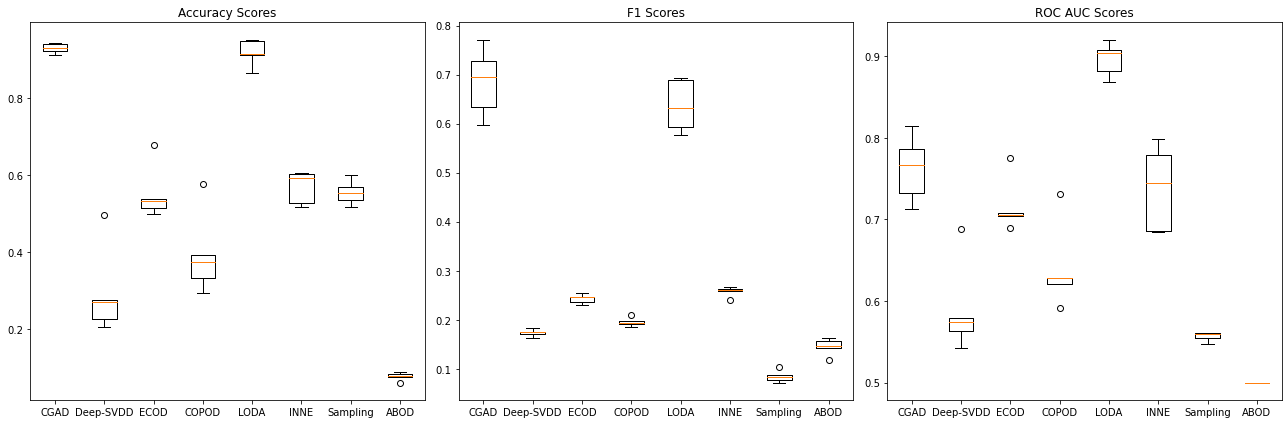

In [155]:
# Create boxplots for each metric
plt.figure(figsize=(18, 6))  # Adjust figure size as needed

plt.subplot(1, 3, 1)
plt.boxplot(acc_box, labels=models)
plt.title("Accuracy Scores")

plt.subplot(1, 3, 2)
plt.boxplot(f1_box, labels=models)
plt.title("F1 Scores")

plt.subplot(1, 3, 3)
plt.boxplot(roc_box, labels=models)
plt.title("ROC AUC Scores")

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

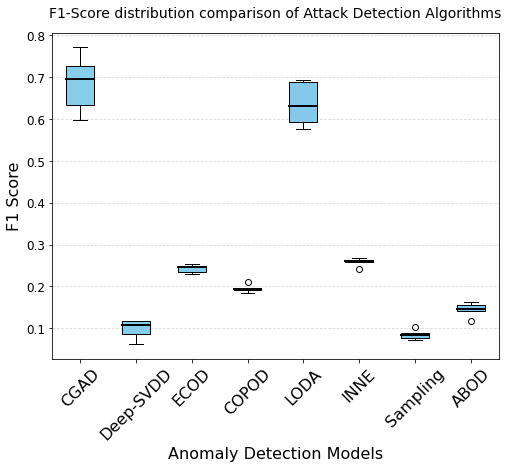

In [307]:
import matplotlib.colors as colors
# Define a visually appealing blue color palette
cmap = colors.LinearSegmentedColormap.from_list("", ["skyblue", "cornflowerblue", "royalblue", "mediumblue", "blue", "darkblue", "midnightblue"])

# Create the boxplot with colors
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
bp = plt.boxplot(f1_box, patch_artist=True, medianprops={"linewidth": 2, "color": "black"}, labels=models)

for box, color in zip(bp['boxes'], cmap(range(len(models)))):
    box.set_facecolor(color)

# Customize the plot
plt.xlabel("Anomaly Detection Models", fontsize=16)
plt.ylabel("F1 Score", fontsize=16)
plt.title("F1-Score distribution comparison of Attack Detection Algorithms", fontsize=14, pad=15)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.savefig("f1_box.jpg", format="jpeg", dpi = 300, bbox_inches = 'tight' )
plt.show()

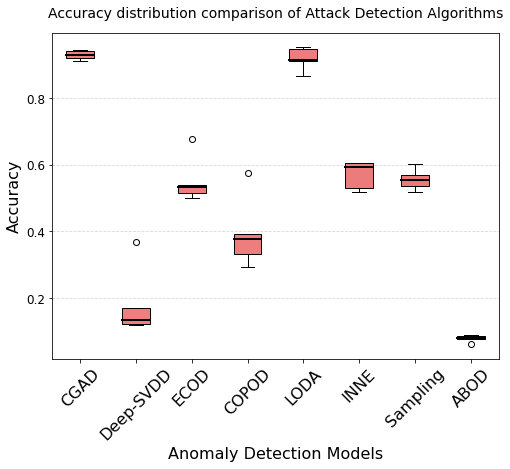

In [306]:
import matplotlib.colors as colors
# Define a visually appealing blue color palette
cmap = colors.LinearSegmentedColormap.from_list("", ["lightcoral", "indianred", "firebrick", "red", "maroon", "darkred", "brown"])


# Create the boxplot with colors
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
bp = plt.boxplot(acc_box, patch_artist=True, medianprops={"linewidth": 2, "color": "black"}, labels=models)

for box, color in zip(bp['boxes'], cmap(range(len(models)))):
    box.set_facecolor(color)

# Customize the plot
plt.xlabel("Anomaly Detection Models", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.title("Accuracy distribution comparison of Attack Detection Algorithms", fontsize=14, pad=15)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.savefig("acc_box.jpg", format="jpeg", dpi = 300, bbox_inches = 'tight')
plt.show()

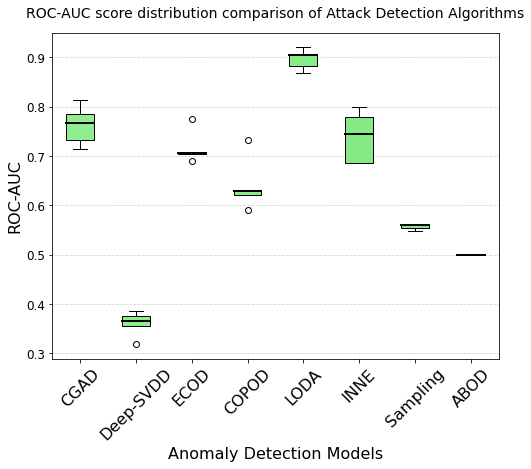

In [305]:
import matplotlib.colors as colors
# Define a visually appealing blue color palette
cmap = colors.LinearSegmentedColormap.from_list("", ["lightgreen", "limegreen", "forestgreen", "seagreen", "darkgreen", "olive", "darkolivegreen"])



# Create the boxplot with colors
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
bp = plt.boxplot(roc_box, patch_artist=True, medianprops={"linewidth": 2, "color": "black"}, labels=models)

for box, color in zip(bp['boxes'], cmap(range(len(models)))):
    box.set_facecolor(color)

# Customize the plot
plt.xlabel("Anomaly Detection Models", fontsize=16)
plt.ylabel("ROC-AUC", fontsize=16)
plt.title("ROC-AUC score distribution comparison of Attack Detection Algorithms", fontsize=14, pad=15)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.savefig("roc_box.jpg", format="jpeg", dpi = 300, bbox_inches = 'tight')
plt.show()

In [4]:
mar_box = mar_box = [[0.37,
  0.36153846153846156,
  0.2444444444444444,
  0.3666666666666667,
  0.34,
  0.33333333333333337],
 [0.4429625913716497,
  0.4629625913716497,
  0.5129625913716497,
  0.4429625913716497,
  0.3913716497],
 [0.1924322774831589,
  0.1124322774831589,
  0.1224322774831589,
  0.1245463774831589,
  0.1823534774831589],
 [0.08153934355740293,
  0.16756854634523523,
  0.11675683562345235,
  0.19892307576235235,
  0.1235235426235255],
 [0.3608427690984663,
  0.3356346346346245,
  0.3834635635734623,
  0.3134525346457648,
  0.4624564375473462],
 [0.26943385409201666,
  0.29123423523598342,
  0.23564576487457456,
  0.23265634634634734,
  0.31354654745634623],
 [0.3625346547645235,
  0.3353877024509101,
  0.3754532523413434,
  0.3134426547456345,
  0.3343646858457356],
 [0.0645634, 0.11344, 0.0623523, 0.085674564, 0.102134123]]
models = ["CGAD", "Deep-SVDD", "ECOD", "COPOD", "LODA", "INNE", "Sampling", "ABOD"]

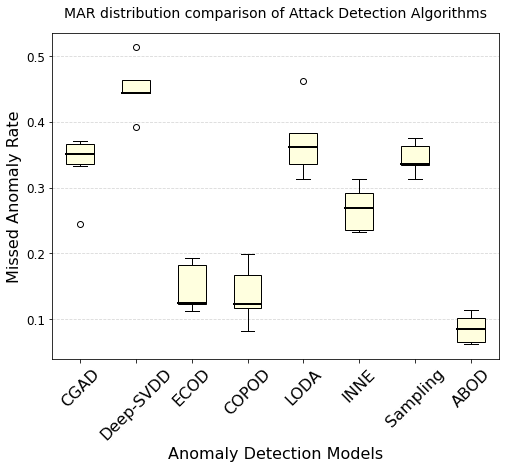

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
# Define a visually appealing blue color palette
cmap = colors.LinearSegmentedColormap.from_list("", ["lightyellow", "lemonchiffon", "khaki", "gold", "darkorange"])



# Create the boxplot with colors
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
bp = plt.boxplot(mar_box, patch_artist=True, medianprops={"linewidth": 2, "color": "black"}, labels=models)

for box, color in zip(bp['boxes'], cmap(range(len(models)))):
    box.set_facecolor(color)

# Customize the plot
plt.xlabel("Anomaly Detection Models", fontsize=16)
plt.ylabel("Missed Anomaly Rate", fontsize=16)
plt.title("MAR distribution comparison of Attack Detection Algorithms", fontsize=14, pad=15)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.savefig("mar_box.jpg", format="jpeg", dpi = 300, bbox_inches = 'tight')
plt.show()

In [249]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your data (replace with your actual file path)
data = pd.read_csv('../SWaT_Dataset/2015/final_csv/attack_data_trainV5.csv',index_col=0).reset_index(drop=True)
data['Timestamp'] = pd.to_datetime(data['Timestamp'])


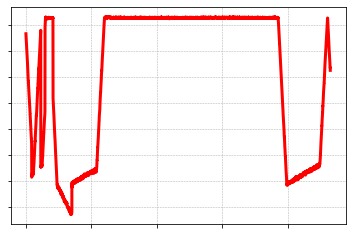

In [250]:
data['Timestamp'] = data['Timestamp'].apply(lambda x:x.value)
# Extract the timestamp and sensor reading columns
timestamps = data["Timestamp"]
sensor_readings = data["LIT101"]



# Create the line plot
plt.plot(sensor_readings[10000:], color="red", linewidth=3)

# Remove y-axis labels and ticks
plt.tick_params(labelbottom=False, labelleft=False)
plt.grid(True, linestyle="--", linewidth=0.5)

# # Add x-axis label
# plt.xlabel("Timestamp")

# # Add title (optional)
# plt.title("Sensor Readings over Time")

# Show the plot
plt.savefig("sensor_reading_Attack.jpg", format="jpeg", dpi=300)
plt.show()

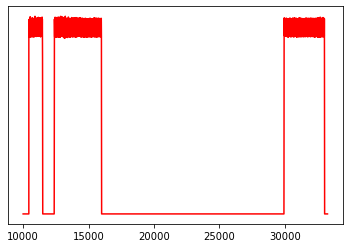

In [206]:
data['Timestamp'] = data['Timestamp'].apply(lambda x:x.value)
# Extract the timestamp and sensor reading columns
timestamps = data["Timestamp"]
sensor_readings = data["FIT101"]



# Create the line plot
plt.plot(sensor_readings[10000:], color="red")

# Remove y-axis labels and ticks
plt.tick_params(left=False, labelleft=False)

# # Add x-axis label
# plt.xlabel("Timestamp")

# # Add title (optional)
# plt.title("Sensor Readings over Time")

# Show the plot
plt.show()

In [251]:
normdata = pd.read_csv('../SWaT_Dataset/2015/final_csv/normal_data_trainV5.csv',index_col=0).reset_index(drop=True)
normdata['Timestamp'] = pd.to_datetime(normdata['Timestamp'])

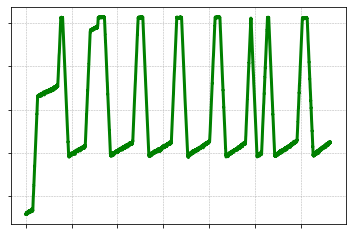

In [252]:
normdata['Timestamp'] = normdata['Timestamp'].apply(lambda x:x.value)
# Extract the timestamp and sensor reading columns
timestamps = normdata["Timestamp"]
normsensor_readings = normdata["LIT101"]



# Create the line plot
plt.plot(normsensor_readings[10000:10000+33254], color="green", linewidth=3)

# Remove y-axis labels and ticks
plt.tick_params(labelleft=False, labelbottom=False)
plt.grid(True, linestyle="--", linewidth=0.5)

# # Add x-axis label
# plt.xlabel("Timestamp")

# # Add title (optional)
# plt.title("Sensor Readings over Time")

# Show the plot
plt.savefig("sensor_reading_normal.jpg", format="jpeg", dpi=300)
plt.show()

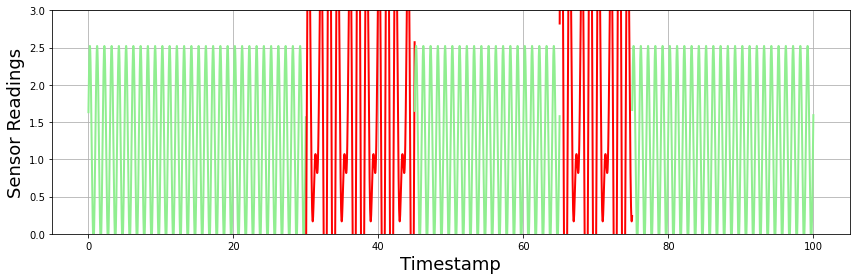

In [182]:
import matplotlib.pyplot as plt
import numpy as np

# Generate ECG-like signal data
t = np.linspace(0, 200, 20000)  # Increase data points for even more readings per second
signal = 1.5 * np.sin(2 * np.pi * t) + 0.5 * np.sin(2 * np.pi * t + np.pi/1.5)+1.2
att_signal = 2 * np.sin(2 * np.pi * t) + 2.5 * np.sin(1.5 * np.pi * t + np.pi/1.5)+1.5

# Create line plot with blue starting and red middle section
plt.figure(figsize=(12, 4))
plt.plot(t[:3000], signal[:3000], color="lightgreen", linewidth=2)  # Blue for first 3000 points, thicker line
plt.plot(t[3000:4500], att_signal[3000:4500], color="red", linewidth=2)  # Red for middle 3000 points, thicker line
plt.plot(t[4500:6500], signal[4500:6500], color="lightgreen", linewidth=2)  # Blue for remaining points, thicker line
plt.plot(t[6500:7500], att_signal[6500:7500], color="red", linewidth=2)
plt.plot(t[7500:10000], signal[7500:10000], color="lightgreen", linewidth=2)

# Customize plot
plt.xlabel("Timestamp", fontsize=18)
plt.ylabel("Sensor Readings", fontsize=18)
# plt.title("WTN Sensor Readings", fontsize=14)
plt.grid(True)

# Adjust y-axis limits for visual appeal
plt.ylim(0, 3)

# Show plot
plt.tight_layout()
plt.savefig("test_data_signal.jpg", format="jpeg", dpi=300)
plt.show()